# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.26932          0.21762              0.00011   
1            1.00000           0.84205          0.21874              0.02370   
2            1.00000           0.74843          0.17379              0.00000   
3            1.00000           0.74843          0.15288              0.00000   
4            1.00000           0.74843          0.21762              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75045                0.00625                   0.00004   
1            0.75054                0.00932                   0.00007   
2            0.75051                0.00000                   0.00000   
3            0.75027                0.00084                   0.00001   
4            0.81909                0.00034                   0.00000   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00001            0.00675                0.00000  ...   
1               0.00002            0.00675                0.00000  ...   
2               0.00000            0.00208                0.00000  ...   
3               0.00000            0.00592                0.00000  ...   
4               0.00000            0.00079                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0        3694                       9       tcp      ssl          SF   
1        4812                      12       tcp      ssl          SF   
2         180                       2       udp      dns         SHR   
3         382                       2       udp     none          SF   
4         540                       2       udp      dns          SF   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn  resp_well_known              No           Yes   
3  orig_reg_or_dyn  resp_well_known              No            No   
4  orig_reg_or_dyn          resp_53              No            No   

                     timestamp  
0  2017-07-06T12:06:35.060859Z  
1  2017-07-06T12:06:37.071614Z  
2  2017-07-06T12:05:16.358339Z  
3  2017-07-06T12:04:38.814779Z  
4  2017-07-06T12:06:35.056945Z  

[5 rows x 294 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.59488          0.18691              0.00232   
1            1.00000           0.07786          0.69326              0.00355   
2            1.00000           0.27903          0.83932              0.01740   
3            1.00000           0.74843          0.37158              0.00002   
4            1.00000           0.74843          0.39924              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75100                0.00000                   0.00000   
1            0.77352                0.01271                   0.00008   
2            0.58976                0.00417                   0.00007   
3            0.68121                0.00035                   0.00000   
4            0.90291                0.00032                   0.00000   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00000            0.00675                0.00000  ...   
1               0.00001            0.00675                0.00002  ...   
2               0.00003            0.00121                0.00002  ...   
3               0.00000            0.00079                0.00000  ...   
4               0.00000            0.00079                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0           0                       0       tcp     none          S0   
1       71868                      40       tcp      ssl        RSTO   
2       73318                      43       tcp     http        RSTR   
3         202                       2       udp      dns          SF   
4         384                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn    resp_443              No            No   
1  orig_reg_or_dyn    resp_443              No            No   
2  orig_reg_or_dyn     resp_80              No            No   
3  orig_reg_or_dyn     resp_53              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-06T12:05:39.904575Z  
1  2017-07-06T12:20:49.089868Z  
2  2017-07-06T12:25:11.357638Z  
3   2017-07-06T12:11:11.49219Z  
4  2017-07-06T12:12:01.164343Z  

[5 rows x 294 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21876 rows and 294 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        21876.00000       21876.00000      21876.00000   
mean             0.98609           0.65304          0.55982   
std              0.11707           0.20341          0.26665   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.67338          0.34501   
50%              1.00000           0.74843          0.55266   
75%              1.00000           0.74843          0.79715   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          21876.00000        21876.00000            21876.00000   
mean               0.01112            0.71033                0.00263   
std                0.03871            0.29886                0.01713   
min                0.00000            0.00000                0.00000   
25%                0.00000            0.67716                0.00024   
50%                0.00003            0.79995                0.00034   
75%                0.00031            0.92480                0.00082   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               21876.00000           21876.00000        21876.00000   
mean                    0.00007               0.00006            0.00356   
std                     0.00676               0.00676            0.03128   
min                     0.00000               0.00000            0.00000   
25%                     0.00000               0.00000            0.00079   
50%                     0.00000               0.00000            0.00079   
75%                     0.00001               0.00000            0.00121   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            21876.00000               21876.00000           21876.00000   
mean                 0.00005                   0.00005               0.00005   
std                  0.00676                   0.00676               0.00676   
min                  0.00000                   0.00000               0.00000   
25%                  0.00000                   0.00000               0.00000   
50%                  0.00000                   0.00000               0.00000   
75%                  0.00000                   0.00000               0.00000   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 21876.00000 21876.00000 21876.00000 21876.00000  21876.00000   
mean      0.64098     0.00155     0.07922     0.13023      0.00487   
std       0.47973     0.03939     0.27009     0.33657      0.03005   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      21876.00000                     21876.00000   
mean           0.39578                         0.53710   
std            0.27930                         0.26192   
min            0.00000                         0.00000   
25%            0.13154                         0.32212   
50%            0.36361                         0.52805   
75%            0.60827                         0.78512   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         21876.00000   
mean                              0.32052   
std                               0.20757   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.18691              0.00232            0.75100   
1          0.69326              0.00355            0.77352   
2          0.83932              0.01740            0.58976   
3          0.37158              0.00002            0.68121   
4          0.39924              0.00000            0.90291   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00000               0.00000            0.00675   
1                0.01271               0.00001            0.00675   
2                0.00417               0.00003            0.00121   
3                0.00035               0.00000            0.00079   
4                0.00032               0.00000            0.00079   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00000               0.00000    0.00000    0.00000   
1                0.00002               0.00003    0.00000    0.00000   
2                0.00002               0.00003    0.00000    0.00000   
3                0.00000               0.00000    1.00000    0.00000   
4                0.00000               0.00000    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    1.00000      0.00000                           1   
2     1.00000    0.00000      0.00000                           1   
3     0.00000    0.00000      0.00000                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    1                   0   
1                   0                    1                   0   
2                   0                    0                   0   
3                   0                    0                   1   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   1                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     1   
1                           0                      0                     1   
2                           0                      0                     1   
3                           0                      0                     0   
4                           0                      0                     0   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     0                           0                       0   
1                     0                           0                       0   
2                     0                           0                       0   
3                     1                           0                       1   
4                     1                           0                       1   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=205)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 205 principal components: 1.000000000000001


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999999]
Variance Captured by First  10 Principal Components: [0.90341389]
Variance Captured by First   7 Principal Components: [0.86357117]
Variance Captured by First   5 Principal Components: [0.81952844]
Variance Captured by First   2 Principal Components: [0.70824904]
Variance Captured by the First Principal Component:  [0.58753284]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.35700539
Variance of connection.duration                       : 0.23052745
Variance of connection.orig_p                         : 0.06872066
Variance of connection.orig_bytes                     : 0.05199553
Variance of connection.orig_pkts                      : 0.04333059
Variance of connection.resp_p                         : 0.03796222
Variance of connection.resp_bytes                     : 0.02998659
Variance of connection.resp_pkts                      : 0.02375135
Variance of dns_count                                 : 0.02029138
Variance of ssh_count                                 : 0.01586917
Variance of http_count                                : 0.01300446
Variance of ssl_count                                 : 0.01096909
Variance of files_count                               : 0.00874714
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00838907
Variance of orig_p_cat_orig_well_known                : 0.0070

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0            0.00188              0.00733           -0.02442   
1            0.01739             -0.00506            0.04826   
2           -0.04115             -0.00724           -0.25781   
3            0.01494              0.00223            0.04834   
4            0.32280             -0.00240           -0.03765   
..               ...                  ...                ...   
200          0.00000              0.00000            0.00000   
201         -0.00000             -0.00000            0.00000   
202         -0.00000             -0.00000           -0.00000   
203         -0.00000              0.00000            0.00000   
204          0.00000             -0.00000           -0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00133               0.00004            0.00077   
1                 -0.00111              -0.00003           -0.00115   
2                 -0.00095              -0.00009            0.00051   
3                  0.00162              -0.00014            0.00232   
4                 -0.00059              -0.00002           -0.00050   
..                     ...                   ...                ...   
200                0.00000              -0.00000           -0.00000   
201               -0.00000              -0.00000            0.00000   
202               -0.00000              -0.00000            0.00000   
203                0.00000               0.00000            0.00000   
204                0.00000              -0.00000            0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00003               0.00003   -0.20071    0.00030   
1                 -0.00003              -0.00003    0.13823   -0.00100   
2                 -0.00009              -0.00009   -0.09177    0.00006   
3                 -0.00014              -0.00014    0.02281    0.00131   
4                 -0.00001              -0.00001   -0.06703    0.00245   
..                     ...                   ...        ...        ...   
200                0.00000              -0.00000   -0.00000    0.01943   
201               -0.00000               0.00000    0.00000   -0.01308   
202                0.00000              -0.00000   -0.00000   -0.00874   
203               -0.00000               0.00000    0.00000   -0.00741   
204                0.00000               0.00000   -0.00000    0.00000   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.05218    0.09490      0.00315                    -0.02949   
1      -0.03666   -0.06090     -0.00246                     0.00585   
2      -0.08865   -0.05361     -0.00320                    -0.25175   
3      -0.17616    0.29143      0.00149                     0.12162   
4       0.09045   -0.09837      0.00244                    -0.00154   
..          ...        ...          ...                         ...   
200    -0.00000   -0.00254      0.00000                    -0.00259   
201    -0.00000   -0.01297      0.00000                     0.02024   
202     0.00000   -0.01349      0.00000                    -0.00465   
203     0.00000    0.00104     -0.00000                     0.01734   
204     0.00000   -0.00000     -0.00000                     0.00000   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.02949              0.02817             0.00025   
1                      -0.00585             -0.00594            -0.00082   
2                       0.25175              0.23949            -0.00016   
3                      -0.12162             -0.11708             0.00110   
4                       0.00154              0.00286             0.00212   
..                          ...                  ...                 ...   
200                    -0.00259             -0.00998            -0.00806   
201                     0.02024  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0      2.52352 -1.20795  0.03972  0.09656 -0.67555  1.04646 -0.01162  0.35394   
1      2.65388 -1.23721 -1.16282 -0.07519 -0.07603 -0.72863 -0.22286 -0.09846   
2      2.66508 -1.33935 -0.45099 -1.25497  1.06331  0.19687  0.52916 -0.85915   
3     -2.08355 -0.88144  0.49462  0.12864 -0.28863 -0.05524  0.19726 -0.64531   
4     -2.22858 -0.79428 -0.73990 -0.49600 -0.58989 -0.48827 -0.02600 -0.20505   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -1.83725  1.02193  1.08745  0.95479  1.06130 -0.12354  1.18841 -0.97288   
21872  0.71173  2.69355 -0.14957 -0.05335  0.36457 -0.51871  0.49661  0.67560   
21873 -1.84491  1.00736  1.13324  0.94774  1.06607 -0.13021  1.19080 -0.98965   
21874  2.66930 -1.43824 -0.95854  0.67969 -1.24929 -0.72597 -0.30199 -0.28946   
21875 -2.19077 -0.62220 -0.63445 -0.24287  0.51067 -0.81763 -0.14323  0.25773   

           8        9        10       11       12       13       14       15   \
0     -0.46133  0.74231  0.94955  1.27164  0.60558 -0.29936 -0.60570 -0.75147   
1      0.07578  0.46257 -0.03027  0.44903 -0.04268 -0.04083  0.23495  0.03879   
2     -1.06489  0.03396  0.34639  0.75766  0.00133  0.50402  0.36763  0.23419   
3     -0.44758 -0.39578  0.46417 -0.19252  0.10698  0.25627 -0.19064  0.06711   
4      0.74535 -0.09810  0.16878  0.15610 -0.08144  0.21349 -0.24386  0.05667   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871  0.34410 -0.39904  0.51231  0.00003  0.15301  0.28760  0.22937  0.47570   
21872 -0.38079  0.17277 -0.02340 -0.08969 -0.42145  0.04274 -0.13231 -0.13800   
21873  0.34778 -0.39864  0.50746  0.01750  0.15201  0.28786  0.22864  0.47141   
21874  0.77451  0.17768 -0.01324 -0.09000 -0.05748  0.03890 -0.10752 -0.04636   
21875  0.09853  0.09664 -0.07427  0.06877  0.25052 -0.29217  0.33328 -0.03327   

           16       17       18       19       20       21       22       23   \
0     -0.44056  0.50357  0.09409  0.42794 -0.23135 -0.32969 -0.23110  0.16303   
1      0.12139  0.13107 -0.09299 -0.43728 -0.07194  0.15960 -0.04236  0.12938   
2      0.09477 -0.55512 -0.40799  0.13466 -0.13528  0.40584 -0.40410 -0.14896   
3      0.21704 -0.21957 -0.14718 -0.02887 -0.11173  0.25409  0.21580  0.02730   
4      0.05852 -0.07992  0.11259 -0.04066 -0.11399  0.18866  0.01112  0.05365   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -0.46340  0.54309 -0.35569  0.02357 -0.25026 -0.47005 -0.06119  0.26792   
21872  0.16433  0.03812  0.04683  0.15949 -0.08123 -0.19604 -0.10001 -0.07262   
21873 -0.47800  0.53178 -0.30702 -0.01110 -0.18175 -0.50547 -0.03412  0.34689   
21874 -0.13075 -0.08786 -0.09555  0.16415  0.22906 -0.34057  0.05988 -0.05021   
21875 -0.09025  0.06332  0.00360 -0.02402 -0.05045 -0.06023 -0.06025  0.03593   

           24       25       26       27       28       29       30       31   \
0     -0.41416  0.02586 -0.44536  0.62017 -0.00053 -0.53350 -0.05342  0.44662   
1     -0.10209  0.62766 -0.35820 -0.11852 -1.04500 -0.04089 -0.33762  0.09302   
2      0.92496  0.09363 -0.27481 -0.32719 -0.05869 -0.13271  0.21007  0.18574   
3     -0.05904 -0.04114  0.01283 -0.09794  0.00499 -0.14464 -0.10271  0.03563   
4     -0.03370  0.04956  0.04008 -0.03285 -0.00739  0.02937 -0.04471 -0.03110   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -0.01869  0.08215  0.00363 -0.04328  0.02324  0.04023  0.02277 -0.23387   
21872  0.07317 -0.00196  0.00466 -0.09979  0.01567  0.09088 -0.10666 -0.04484   
21873  0.03132  0.09085  0.02572 -0.03193  0.01813  0.02656 -0.01452 -0.23404   
21874 -0.00888 -0.04848 -0.02908  0.07989  0.02220  0.15202 -0.02017  0.00072   
21875 -0.00322 -0.03127 -0.00882  0.01548 -0.00958  0.01007 -0.00375  0.01807   

           32       33       34       35       36       37       38       39   \
0     -0.05824  0.16728 -0.49621  0.03

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:30:10.
DBSCAN finished (00:30:31)
Done at 00:30:31.


In [20]:
print_str

'DBSCAN finished (00:30:31)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    3,     4,     5, ..., 21873, 21874, 21875])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[-2.08354987e+00, -8.81435930e-01,  4.94618007e-01, ...,
         5.62994912e-06,  7.73218100e-05,  2.51128015e-06],
       [-2.22857514e+00, -7.94280196e-01, -7.39902173e-01, ...,
         3.08157545e-04,  2.77974862e-04, -7.59601614e-05],
       [ 7.79886978e-04,  3.12644438e+00, -5.19282738e-01, ...,
         2.43173487e-04,  2.48132357e-04, -2.40151671e-05],
       ...,
       [-1.84491426e+00,  1.00736138e+00,  1.13324107e+00, ...,
        -5.56029761e-04, -4.34353481e-04, -4.22231868e-04],
       [ 2.66930165e+00, -1.43823666e+00, -9.58540252e-01, ...,
         3.17082805e-04, -5.95748361e-05, -3.77350767e-04],
       [-2.19076642e+00, -6.22200573e-01, -6.34452483e-01, ...,
         1.20154288e-03,  1.11664917e-03,  1.84035453e-04]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([-1,  5, -1, ...,  6,  5,  0])

In [25]:
y_db

array([-1,  5, -1, ...,  6,  5,  0])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0  2.52352 -1.20795  0.03972  0.09656 -0.67555  1.04646 -0.01162  0.35394   
1  2.65388 -1.23721 -1.16282 -0.07519 -0.07603 -0.72863 -0.22286 -0.09846   
2  2.66508 -1.33935 -0.45099 -1.25497  1.06331  0.19687  0.52916 -0.85915   
3 -2.08355 -0.88144  0.49462  0.12864 -0.28863 -0.05524  0.19726 -0.64531   
4 -2.22858 -0.79428 -0.73990 -0.49600 -0.58989 -0.48827 -0.02600 -0.20505   

         8        9       10       11       12       13       14       15  \
0 -0.46133  0.74231  0.94955  1.27164  0.60558 -0.29936 -0.60570 -0.75147   
1  0.07578  0.46257 -0.03027  0.44903 -0.04268 -0.04083  0.23495  0.03879   
2 -1.06489  0.03396  0.34639  0.75766  0.00133  0.50402  0.36763  0.23419   
3 -0.44758 -0.39578  0.46417 -0.19252  0.10698  0.25627 -0.19064  0.06711   
4  0.74535 -0.09810  0.16878  0.15610 -0.08144  0.21349 -0.24386  0.05667   

        16       17       18       19       20       21       22       23  \
0 -0.44056  0.50357  0.09409  0.42794 -0.23135 -0.32969 -0.23110  0.16303   
1  0.12139  0.13107 -0.09299 -0.43728 -0.07194  0.15960 -0.04236  0.12938   
2  0.09477 -0.55512 -0.40799  0.13466 -0.13528  0.40584 -0.40410 -0.14896   
3  0.21704 -0.21957 -0.14718 -0.02887 -0.11173  0.25409  0.21580  0.02730   
4  0.05852 -0.07992  0.11259 -0.04066 -0.11399  0.18866  0.01112  0.05365   

        24       25       26       27       28       29       30       31  \
0 -0.41416  0.02586 -0.44536  0.62017 -0.00053 -0.53350 -0.05342  0.44662   
1 -0.10209  0.62766 -0.35820 -0.11852 -1.04500 -0.04089 -0.33762  0.09302   
2  0.92496  0.09363 -0.27481 -0.32719 -0.05869 -0.13271  0.21007  0.18574   
3 -0.05904 -0.04114  0.01283 -0.09794  0.00499 -0.14464 -0.10271  0.03563   
4 -0.03370  0.04956  0.04008 -0.03285 -0.00739  0.02937 -0.04471 -0.03110   

        32       33       34       35       36       37       38       39  \
0 -0.05824  0.16728 -0.49621  0.03697 -0.05922 -0.08520 -0.08905  0.12474   
1 -0.20418 -0.07776  0.02795  0.27861  0.37229  0.02907  0.73215  0.05719   
2  0.39765  0.08105 -0.04660 -0.13230 -0.06336 -0.00748 -0.08672  0.03767   
3  0.07715 -0.00363  0.05821  0.01015  0.00202  0.04617  0.01859 -0.04829   
4  0.00804 -0.05055  0.06692 -0.00254  0.00041 -0.01104 -0.01039 -0.00987   

        40       41       42       43       44       45       46       47  \
0 -0.09921  0.12746 -0.06945 -0.06577  0.03175 -0.07431 -0.19257 -0.02124   
1 -0.21768 -0.03442 -0.20093  0.12141  0.01135  0.03705  0.18576  0.03825   
2 -0.15714  0.01614 -0.07362  0.03801  0.01416  0.04610  0.09029  0.07257   
3  0.04426  0.03356  0.06319 -0.03118 -0.00693  0.02828  0.01470  0.03419   
4  0.02029 -0.04668 -0.03571  0.01247 -0.01587  0.03359 -0.03009  0.01629   

        48       49       50       51       52       53       54       55  \
0 -0.30670  0.01529  0.08564 -0.05158 -0.03518 -0.05259  0.08778  0.10811   
1  0.06159 -0.05299 -0.01080 -0.02952  0.05776 -0.09504  0.14250 -0.10157   
2  0.00009 -0.00030  0.10900  0.12355 -0.03222 -0.08348 -0.00299 -0.02431   
3 -0.02292 -0.02667 -0.01682  0.00139  0.02532 -0.00931 -0.00835  0.00729   
4 -0.01912  0.02666  0.00305  0.00484  0.01384 -0.01070  0.01986 -0.00901   

        56       57       58       59       60       61       62       63  \
0  0.08498 -0.14181 -0.07709 -0.02154 -0.10403  0.02739  0.16572  0.05084   
1  0.10257  0.08922  0.06769 -0.07130 -0.03188 -0.01595 -0.04185  0.08853   
2  0.03530  0.02522 -0.00483 -0.02911  0.01206 -0.02799  0.00463 -0.02893   
3  0.01862 -0.00240  0.01279 -0.00234 -0.01821 -0.04998  0.01693  0.00860   
4 -0.04690  0.01806 -0.00399  0.02206  0.02154  0.00268 -0.00219  0.01860   

        64       65      66       67       68       69       70       71  \
0 -0.06658 -0.05141 0.08685  0.00892  0.03994 -0.00241 -0.05032  0.01984   
1  0.02918 -0.00224 0.03434 -0.05086  0.21658 -0.05798  0.14233 -0.25430   
2 -0.03677  0.04264 0.02587  0.00771  0.03256  0.01860  0.01874  0.03238   
3

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 0    8625
 3    2690
 5    2396
-1    2124
 4    2065
 1    1619
 2     977
 6     554
 7     299
 9     276
 8     251
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([-1,  5,  0,  1,  4,  2,  3,  6,  7,  8,  9])

## 3. Results

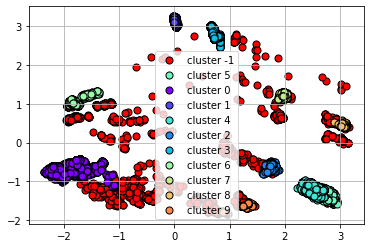

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

K_CLUSTERS = len(pca_X['cluster'].value_counts())

colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

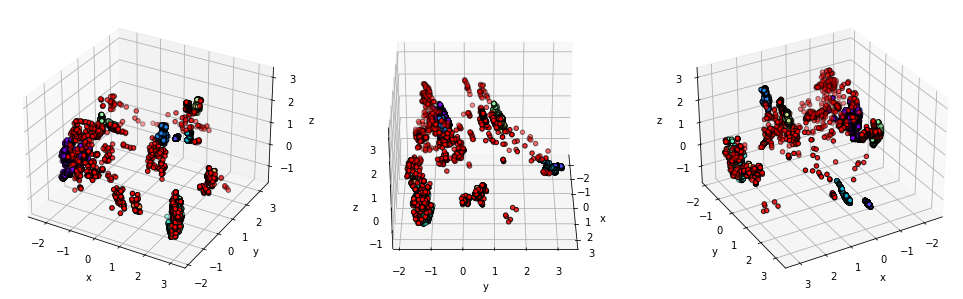

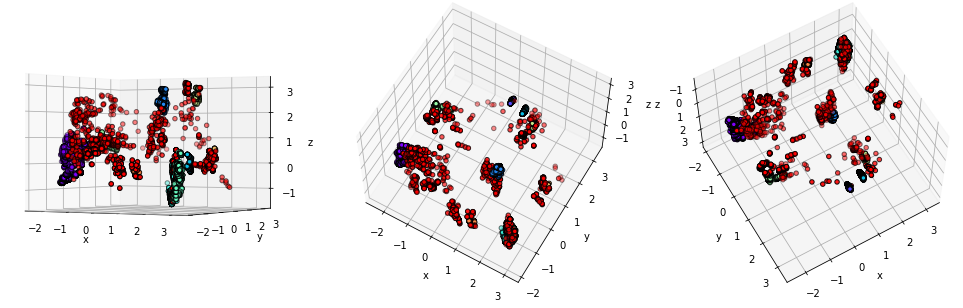

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0      2.52352 -1.20795  0.03972  0.09656 -0.67555  1.04646 -0.01162  0.35394   
1      2.65388 -1.23721 -1.16282 -0.07519 -0.07603 -0.72863 -0.22286 -0.09846   
2      2.66508 -1.33935 -0.45099 -1.25497  1.06331  0.19687  0.52916 -0.85915   
3     -2.08355 -0.88144  0.49462  0.12864 -0.28863 -0.05524  0.19726 -0.64531   
4     -2.22858 -0.79428 -0.73990 -0.49600 -0.58989 -0.48827 -0.02600 -0.20505   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -1.83725  1.02193  1.08745  0.95479  1.06130 -0.12354  1.18841 -0.97288   
21872  0.71173  2.69355 -0.14957 -0.05335  0.36457 -0.51871  0.49661  0.67560   
21873 -1.84491  1.00736  1.13324  0.94774  1.06607 -0.13021  1.19080 -0.98965   
21874  2.66930 -1.43824 -0.95854  0.67969 -1.24929 -0.72597 -0.30199 -0.28946   
21875 -2.19077 -0.62220 -0.63445 -0.24287  0.51067 -0.81763 -0.14323  0.25773   

             8        9       10       11       12       13       14       15  \
0     -0.46133  0.74231  0.94955  1.27164  0.60558 -0.29936 -0.60570 -0.75147   
1      0.07578  0.46257 -0.03027  0.44903 -0.04268 -0.04083  0.23495  0.03879   
2     -1.06489  0.03396  0.34639  0.75766  0.00133  0.50402  0.36763  0.23419   
3     -0.44758 -0.39578  0.46417 -0.19252  0.10698  0.25627 -0.19064  0.06711   
4      0.74535 -0.09810  0.16878  0.15610 -0.08144  0.21349 -0.24386  0.05667   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871  0.34410 -0.39904  0.51231  0.00003  0.15301  0.28760  0.22937  0.47570   
21872 -0.38079  0.17277 -0.02340 -0.08969 -0.42145  0.04274 -0.13231 -0.13800   
21873  0.34778 -0.39864  0.50746  0.01750  0.15201  0.28786  0.22864  0.47141   
21874  0.77451  0.17768 -0.01324 -0.09000 -0.05748  0.03890 -0.10752 -0.04636   
21875  0.09853  0.09664 -0.07427  0.06877  0.25052 -0.29217  0.33328 -0.03327   

            16       17       18       19       20       21       22       23  \
0     -0.44056  0.50357  0.09409  0.42794 -0.23135 -0.32969 -0.23110  0.16303   
1      0.12139  0.13107 -0.09299 -0.43728 -0.07194  0.15960 -0.04236  0.12938   
2      0.09477 -0.55512 -0.40799  0.13466 -0.13528  0.40584 -0.40410 -0.14896   
3      0.21704 -0.21957 -0.14718 -0.02887 -0.11173  0.25409  0.21580  0.02730   
4      0.05852 -0.07992  0.11259 -0.04066 -0.11399  0.18866  0.01112  0.05365   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -0.46340  0.54309 -0.35569  0.02357 -0.25026 -0.47005 -0.06119  0.26792   
21872  0.16433  0.03812  0.04683  0.15949 -0.08123 -0.19604 -0.10001 -0.07262   
21873 -0.47800  0.53178 -0.30702 -0.01110 -0.18175 -0.50547 -0.03412  0.34689   
21874 -0.13075 -0.08786 -0.09555  0.16415  0.22906 -0.34057  0.05988 -0.05021   
21875 -0.09025  0.06332  0.00360 -0.02402 -0.05045 -0.06023 -0.06025  0.03593   

            24       25       26       27       28       29       30       31  \
0     -0.41416  0.02586 -0.44536  0.62017 -0.00053 -0.53350 -0.05342  0.44662   
1     -0.10209  0.62766 -0.35820 -0.11852 -1.04500 -0.04089 -0.33762  0.09302   
2      0.92496  0.09363 -0.27481 -0.32719 -0.05869 -0.13271  0.21007  0.18574   
3     -0.05904 -0.04114  0.01283 -0.09794  0.00499 -0.14464 -0.10271  0.03563   
4     -0.03370  0.04956  0.04008 -0.03285 -0.00739  0.02937 -0.04471 -0.03110   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21871 -0.01869  0.08215  0.00363 -0.04328  0.02324  0.04023  0.02277 -0.23387   
21872  0.07317 -0.00196  0.00466 -0.09979  0.01567  0.09088 -0.10666 -0.04484   
21873  0.03132  0.09085  0.02572 -0.03193  0.01813  0.02656 -0.01452 -0.23404   
21874 -0.00888 -0.04848 -0.02908  0.07989  0.02220  0.15202 -0.02017  0.00072   
21875 -0.00322 -0.03127 -0.00882  0.01548 -0.00958  0.01007 -0.00375  0.01807   

            32       33       34       35       36       37       38       39  \
0     -0.05824  0.16728 -0.49621  0.0369

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0           -1     2124      udp     dns         SF  orig_reg_or_dyn   
1            0     8625      udp     dns         SF  orig_reg_or_dyn   
2            1     1619      udp     dns         SF  orig_reg_or_dyn   
3            2      977      udp     ntp         SF  orig_well_known   
4            3     2690      udp     dns         SF  orig_reg_or_dyn   
5            4     2065      tcp    http         SF  orig_reg_or_dyn   
6            5     2396      tcp     ssl         SF  orig_reg_or_dyn   
7            6      554      udp     dns         SF  orig_reg_or_dyn   
8            7      299      udp     ntp         SF  orig_well_known   
9            8      251      tcp     ssl         SF  orig_reg_or_dyn   
10           9      276      tcp    none         SF  orig_reg_or_dyn   

         resp_p_cat  connection.time  connection.duration  \
0   resp_well_known          0.50210              0.01444   
1           resp_53          0.55095              0.00004   
2           resp_53          0.69782              0.00009   
3          resp_123          0.44526              0.00314   
4           resp_53          0.50893              0.00016   
5           resp_80          0.57725              0.04336   
6          resp_443          0.52652              0.04450   
7           resp_53          0.73620              0.00080   
8          resp_123          0.76485              0.00005   
9          resp_443          0.66350              0.04282   
10          resp_80          0.86148              0.00436   

    connection.orig_bytes  connection.orig_pkts  connection.resp_bytes  \
0                 0.00767               0.00050                0.00049   
1                 0.00042               0.00000                0.00000   
2                 0.00024               0.00000                0.00000   
3                 0.00030               0.00000                0.00000   
4                 0.00024               0.00000                0.00000   
5                 0.00458               0.00003                0.00002   
6                 0.01040               0.00002                0.00001   
7                 0.00031               0.00000                0.00000   
8                 0.00021               0.00000                0.00000   
9                 0.00655               0.00002                0.00001   
10                0.00011               0.00000                0.00000   

    connection.resp_pkts  dns_count  ssh_count  http_count  ssl_count  \
0                0.00049    0.27354    0.01601     0.07910    0.09699   
1                0.00000    0.99455    0.00000     0.00000    0.00000   
2                0.00000    1.00000    0.00000     0.00000    0.00000   
3                0.00000    0.00000    0.00000     0.00000    0.00000   
4                0.00000    1.00000    0.00000     0.00000    0.00000   
5                0.00003    0.00000    0.00000     0.75109    0.00000   
6                0.00002    0.00000    0.00000     0.00000    1.00000   
7                0.00000    1.00000    0.00000     0.00000    0.00000   
8                0.00000    0.00000    0.00000     0.00000    0.00000   
9                0.00002    0.00000    0.00000     0.00000    0.98406   
10               0.00000    0.00000    0.00000     0.05072    0.00000   

    files_count  
0       0.01132  
1       0.00000  
2       0.00000  
3       0.00000  
4       0.00000  
5       0.01641  
6       0.01895  
7       0.00000  
8       0.00000  
9       0.01263  
10      0.00033

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

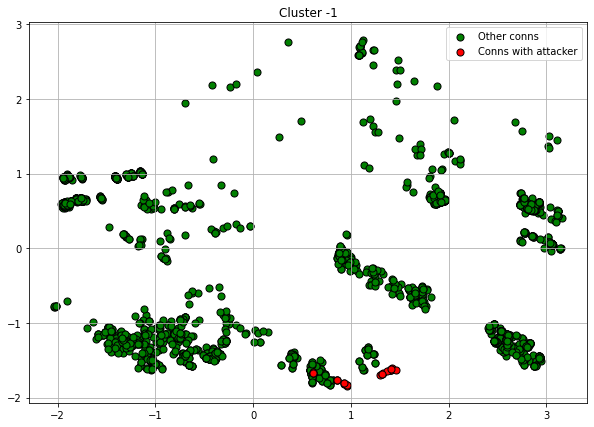

Total num of conns: 2124

Attacker conns ratio:
No     2096
Yes      28
Name: attacker_label, dtype: int64

IPs:
192.168.10.50    525
192.168.10.51    275
192.168.10.19    212
192.168.10.17    190
192.168.10.8     138
192.168.10.16    133
192.168.10.5     127
192.168.10.12    115
192.168.10.15    114
192.168.10.9     110
192.168.10.25     88
192.168.10.3      44
172.16.0.1        28
192.168.10.14     23
192.168.10.1       1
188.92.40.81       1
Name: originated_ip, dtype: int64

192.168.10.3      977
192.168.10.50     150
192.168.10.255    118
224.0.0.251        47
224.0.0.252        25
                 ... 
23.194.141.30       1
131.253.61.98       1
91.189.88.152       1
54.246.108.24       1
91.189.95.83        1
Name: responded_ip, Length: 237, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:04.302801Z
timestamp max = 2017-07-06T12:29:59.8716Z

Cluster -1 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
18648  CdOeKI1o8ivjznEA5b            0.00000    172.16.0.1           0.74843   
13932  CiSCmk2IfpQi3Bnb01            0.00000    172.16.0.1           0.74843   
11447  CuzXUH21n7lb09s8l7            0.00000    172.16.0.1           0.74843   
10285   CXkvE4AsMJgRIrJI9            0.00000    172.16.0.1           0.74843   
11203  CqCk401bSa9zGONGf1            0.00000    172.16.0.1           0.74843   
14502  CH3X6a2938NIhv3gJg            0.00000    172.16.0.1           0.74843   
3281    CMd5Co1Mv7Lakp2Mj            0.00000    172.16.0.1           0.74843   
19985   C2NF7r2WUq01ma2a9            0.00000    172.16.0.1           0.74843   
19796   CAqRMs7EdrLSaYSfb            0.00000    172.16.0.1           0.74843   
681    C4S9wd23CAIovKgYMf            0.00000    172.16.0.1           0.74843   
9865   C70pRi2r7m66n8JgVl            0.00000    172.16.0.1           0.74843   
5928    CtmrsnIj7ysj5niC2            0.00000    172.16.0.1           0.74843   
841     ClP6niJri1Cwx31D7            0.00000    172.16.0.1           0.74843   
14062  Ckz7zh4h9IstTGlXD4            0.00000    172.16.0.1           0.74843   
9689   CZkE1p2B91Fb8qA7Bl            0.00000    172.16.0.1           0.74843   

        responded_ip                    timestamp  connection.time  duration  \
18648  192.168.10.50    2017-07-06T12:29:28.1028Z          0.98231  31.73689   
13932  192.168.10.50  2017-07-06T12:16:07.422934Z          0.53639   5.02082   
11447  192.168.10.50  2017-07-06T12:19:27.749556Z          0.64795   4.05036   
10285  192.168.10.50  2017-07-06T12:15:54.880049Z          0.52940   5.18584   
11203  192.168.10.50  2017-07-06T12:21:21.117796Z          0.71109  20.84784   
14502  192.168.10.50  2017-07-06T12:15:55.042962Z          0.52949   5.05757   
3281   192.168.10.50   2017-07-06T12:21:56.96939Z          0.73106  31.48613   
19985  192.168.10.50  2017-07-06T12:28:21.635952Z          0.94529  35.45269   
19796  192.168.10.50  2017-07-06T12:25:07.754632Z          0.83731  35.07092   
681    192.168.10.50  2017-07-06T12:26:46.462425Z          0.89229  33.02840   
9865   192.168.10.50  2017-07-06T12:27:51.325122Z          0.92841  32.85868   
5928   192.168.10.50  2017-07-06T12:22:59.171601Z          0.76570  34.04852   
841    192.168.10.50  2017-07-06T12:19:28.266264Z          0.64824   3.53361   
14062  192.168.10.50  2017-07-06T12:24:37.140031Z          0.82026  33.13784   
9689   192.168.10.50  2017-07-06T12:19:27.660566Z          0.64790   4.13939   

       connection.duration protocol service conn_state  connection.orig_p  \
18648              0.02447      tcp    http         S1            0.79068   
13932              0.00387      tcp    http         SF            0.67729   
11447              0.00312      tcp    none         SF            0.67851   
10285              0.00400      tcp    http         SF            0.67720   
11203              0.01608      tcp    http         SF            0.68108   
14502              0.00390      tcp    http         SF            0.67723   
3281               0.02428      tcp    http         SF            0.68489   
19985              0.02734      tcp    http         SF            0.77520   
19796              0.02705      tcp    http         SF            0.72967   
681                0.02547      tcp    http         SF            0.75283   
9865               0.02534      tcp    http         SF            0.76803   
5928               0.02626      tcp    http         SF            0.69951   
841                0.00273      tcp    none         SF            0.67882   
14062              0.02555      tcp    http         SF            0.72240   
9689               0.00319      tcp    http         SF            0.67848   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
18648   51816  orig_reg_or_dyn                0.18076    40422   
13932   44386  orig_reg_or_dyn                0.00435      973   
11447   44466  orig_reg_or_dy

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
12458   C1qrLp1mJxHsEdZqk            1.00000  192.168.10.17           0.74843   
14210   CKZTIJ5SJ0anAGSJe            1.00000  192.168.10.25           0.74843   
61     CULvLZ1Tts8BTAzLKa            1.00000   192.168.10.5           0.74843   
8234   C0Bqwb4cLdRWDHY58c            1.00000  192.168.10.15           0.36481   
4817    CEGfXzmS0EqAxAz44            1.00000  192.168.10.25           0.74843   
8826   CvdpZ22JcRaToMe4Lj            1.00000  192.168.10.16           0.74843   
16567  CKD4ux4APpUY1UBfd2            1.00000  192.168.10.17           0.74843   
3650   CXcSH126E6Ugo8B2Tf            1.00000  192.168.10.50           0.74843   
463     C3lWsd4ZxpIgwNwTa            1.00000  192.168.10.19           0.73136   
10154   CEgxDh4SoGwQwBSNG            1.00000   192.168.10.9           0.74843   
12153  CfazYX1CeOoxhi5xfe            1.00000  192.168.10.19           0.24660   
14522  C1spWU2KCVmNy1DFdc            1.00000   192.168.10.5           0.77129   
15084  CIxjiN3MS6YIecIAec            1.00000  192.168.10.17           0.74638   
10186   Cv6wNnuiVp5PVQCM6            1.00000   192.168.10.9           0.74843   
18773  CncIyu2JTMHJ6dLep1            1.00000  192.168.10.50           0.74843   

         responded_ip                    timestamp  connection.time  duration  \
12458    192.168.10.3  2017-07-06T12:18:03.585252Z          0.60108  61.62265   
14210    192.168.10.3  2017-07-06T12:24:57.831187Z          0.83179   0.00065   
61       192.168.10.3    2017-07-06T12:04:56.6005Z          0.16279   0.00012   
8234    96.16.193.174  2017-07-06T12:29:19.432317Z          0.97748  40.18166   
4817    192.168.10.50   2017-07-06T12:14:18.07673Z          0.47549   0.07658   
8826     192.168.10.3  2017-07-06T12:11:49.386509Z          0.39268   0.00064   
16567    192.168.10.3  2017-07-06T12:05:03.321503Z          0.16653   0.00126   
3650     192.168.10.3  2017-07-06T12:01:45.687639Z          0.05646   0.00017   
463      188.92.40.78  2017-07-06T12:22:32.770345Z          0.75100   0.00000   
10154   192.168.10.50  2017-07-06T12:29:55.993551Z          0.99784   0.16001   
12153    66.77.22.129  2017-07-06T12:14:31.095422Z          0.48274   3.00283   
14522  198.105.244.11  2017-07-06T12:25:59.227773Z          0.86598   0.03192   
15084  192.35.249.120  2017-07-06T12:20:13.585201Z          0.67348   5.11121   
10186  192.168.10.255  2017-07-06T12:01:54.506396Z          0.06138   0.01665   
18773    192.168.10.3  2017-07-06T12:01:11.198412Z          0.03726   0.00128   

       connection.duration protocol             service conn_state  \
12458              0.04752      tcp                none      RSTRH   
14210              0.00000      udp                 dns         SF   
61                 0.00000      udp                 ntp         SF   
8234               0.03099      tcp                 ssl         S1   
4817               0.00006      tcp  smb,gssapi,dce_rpc         SF   
8826               0.00000      udp                 krb         SF   
16567              0.00000      tcp             krb_tcp       RSTR   
3650               0.00000      udp                 dns         SF   
463                0.00000      tcp                none         S0   
10154              0.00012      tcp                 ftp         SF   
12153              0.00232      tcp                none         S0   
14522              0.00002      tcp                none        REJ   
15084              0.00394      tcp                none         SF   
10186              0.00001      udp                none         S0   
18773              0.00000      tcp             krb_tcp       RSTR   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
12458            0.56351   36930  orig_reg_or_dyn                0.00199   
14210            0.00204     137  orig_well_known                0.00304   
61               0.00183     123  orig_well_known                0.00043   
823

Protocol:
udp     1120
tcp      998
icmp       6
Name: protocol, dtype: int64

Service:
dns                   592
none                  496
ntp                   317
ssl                   206
http                  168
krb_tcp               110
krb                    85
dce_rpc                34
ssh                    32
ftp-data               30
ftp                    30
krb,smb,gssapi         11
smb,gssapi,dce_rpc      9
smb,gssapi              2
ntlm,gssapi,smb         2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1664
orig_well_known     460
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_well_known    517
resp_53            418
resp_443           363
resp_123           317
resp_80            274
resp_reg           143
resp_22             34
resp_21             30
resp_dyn            28
Name: resp_p_cat, dtype: int64




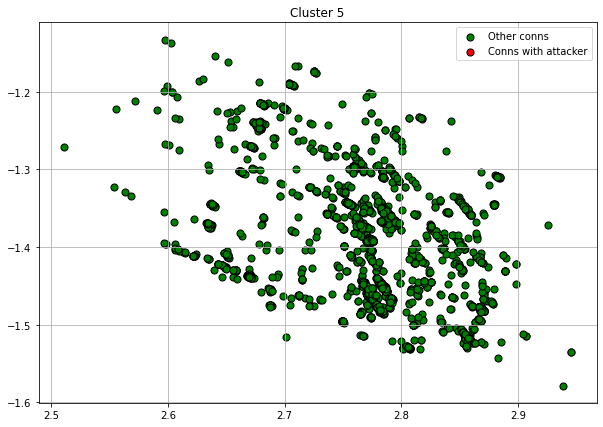

Total num of conns: 2396

Attacker conns ratio:
No    2396
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    560
192.168.10.15    499
192.168.10.14    327
192.168.10.5     250
192.168.10.25    200
192.168.10.51    167
192.168.10.9     141
192.168.10.12    108
192.168.10.16     53
192.168.10.19     51
192.168.10.8      40
Name: originated_ip, dtype: int64

74.117.200.68      69
64.147.131.201     35
172.217.6.194      33
162.213.33.50      32
172.217.10.2       28
                   ..
169.55.165.141      1
151.101.208.175     1
104.88.108.34       1
23.200.16.168       1
210.228.141.153     1
Name: responded_ip, Length: 716, dtype: int64

Time:
timestamp min = 2017-07-06T12:01:20.679314Z
timestamp max = 2017-07-06T12:29:58.627308Z

Cluster 5 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
589     C546sQaolE6Dz57Ai            1.00000   192.168.10.5           0.20088   
6546   CK1zeh17xvILC8EtI4            1.00000  192.168.10.15           0.01534   
8610    CckW05Zu6x9Crhg44            1.00000   192.168.10.5           0.66976   
8458   CAk0aa4cGE9YAJ7O04            1.00000  192.168.10.17           0.66976   
19284   Ce1jFxRsO8ezSmtUj            1.00000   192.168.10.9           0.20132   
17221  C3borj2l4nrTX3a1ci            1.00000  192.168.10.17           0.77326   
3070    CuIHcI5sQhosjOmN1            1.00000  192.168.10.17           0.27900   
15621   CXG1R4jrBBVORqSoa            1.00000  192.168.10.17           0.27900   
3951    CJ0W5b4Iyo4HwmpbG            1.00000  192.168.10.14           0.07781   
19994  CXVxRv2XrknWusr8Zk            1.00000  192.168.10.15           0.07767   
19351  CdasLa3uQKUkWIZ387            1.00000  192.168.10.14           0.27903   
16394  CeYKG84BvjVhH9lV89            1.00000  192.168.10.12           0.07635   
4375   CtUuI04YIJ11BlDq5f            1.00000   192.168.10.5           0.20146   
5855   Cbwmxe4bOU5hkaSTP9            1.00000  192.168.10.17           0.10661   
7042   C4Y4jB163Mv83Sd8J1            1.00000  192.168.10.14           0.20005   

          responded_ip                    timestamp  connection.time  \
589      54.201.188.11  2017-07-06T12:05:26.543536Z          0.17946   
6546        8.18.45.80   2017-07-06T12:29:19.29896Z          0.97740   
8610    172.217.12.142  2017-07-06T12:20:36.908092Z          0.68647   
8458      172.217.11.6  2017-07-06T12:08:06.843326Z          0.26874   
19284     54.230.51.51  2017-07-06T12:29:54.599998Z          0.99706   
17221  198.232.124.196  2017-07-06T12:25:09.111574Z          0.83807   
3070     74.117.200.68  2017-07-06T12:15:25.234346Z          0.51289   
15621    74.117.200.68  2017-07-06T12:29:13.199823Z          0.97401   
3951      23.205.18.73  2017-07-06T12:14:57.019381Z          0.49718   
19994    23.195.254.71  2017-07-06T12:14:33.306963Z          0.48397   
19351    74.119.118.84  2017-07-06T12:23:57.348243Z          0.79810   
16394      23.111.9.32  2017-07-06T12:23:58.594319Z          0.79880   
4375      54.239.28.97  2017-07-06T12:15:47.801461Z          0.52546   
5855       31.13.80.36  2017-07-06T12:11:11.812744Z          0.37175   
7042     54.148.79.143   2017-07-06T12:14:57.82013Z          0.49762   

       duration  connection.duration protocol service conn_state  \
589    60.64444              0.04677      tcp     ssl         SF   
6546    6.04344              0.00466      tcp     ssl         SF   
8610  182.44872              0.14070      tcp     ssl         SF   
8458  119.00211              0.09177      tcp     ssl         SF   
19284   5.10380              0.00394      tcp     ssl         S1   
17221   7.36036              0.00568      tcp     ssl         SF   
3070    5.82966              0.00450      tcp     ssl         SF   
15621   0.14057              0.00011      tcp     ssl         SF   
3951  116.35661              0.08973      tcp     ssl       RSTR   
19994   6.06926              0.00468      tcp     ssl         SF   
19351  50.08513              0.03862      tcp     ssl       RSTR   
16394 119.94479              0.09250      tcp     ssl         SF   
4375    5.32603              0.00411      tcp     ssl         SF   
5855    0.04712              0.00004      tcp     ssl         SF   
7042    5.61402              0.00433      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
589              0.75217   49293  orig_reg_or_dyn                0.02084   
6546             0.78070   51162  orig_reg_or_dyn                0.00145   
8610             0.75668   49588  orig_reg_or_dyn                0.00607   
8458             0.65932   43208  orig_reg_or_dyn                0.02305   
19284            0.01923    1263  orig_reg_or_dyn                0.01662   
17221            0.65349   

Protocol:
tcp    2396
Name: protocol, dtype: int64

Service:
ssl    2396
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2396
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           2371
resp_well_known      25
Name: resp_p_cat, dtype: int64




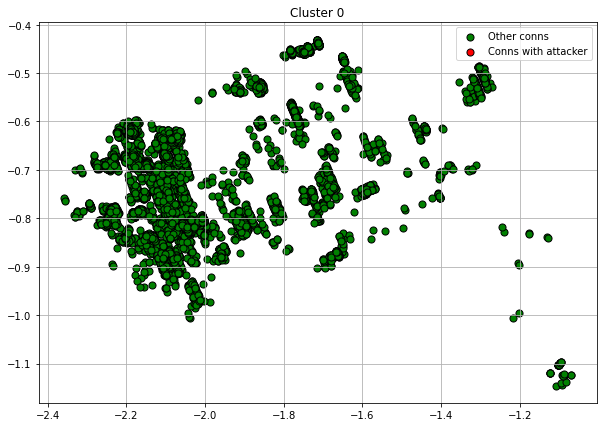

Total num of conns: 8625

Attacker conns ratio:
No    8625
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    4280
192.168.10.17    1512
192.168.10.14     747
192.168.10.5      423
192.168.10.9      378
192.168.10.12     347
192.168.10.16     228
192.168.10.51     218
192.168.10.19     216
192.168.10.25     157
192.168.10.8      119
Name: originated_ip, dtype: int64

192.168.10.3    8625
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:37.858639Z
timestamp max = 2017-07-06T12:29:59.832497Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
1917   CXKXRi4Ng8xo8KJdY1            1.00000  192.168.10.19           0.74843   
7007   Csjw4i3nJPGD38WlK3            1.00000  192.168.10.15           0.74843   
5209   ClGrYI28GP3B4RRTYi            1.00000  192.168.10.15           0.74843   
2542    CN9bvxhOLTvN8RLr8            1.00000  192.168.10.14           0.74843   
20618    C3tId4ESc7ZHWNdN            1.00000  192.168.10.15           0.74843   
8745   Ca1R931dhwTEmmTyt6            1.00000  192.168.10.15           0.74843   
10768  CaXny435vapj5852U6            1.00000  192.168.10.14           0.74843   
1055   Cz1gYt24x9dp4kJVRd            1.00000  192.168.10.14           0.74843   
19391  CwJxC74wM2QDBEe71k            1.00000  192.168.10.17           0.74843   
14903   CbrQLaYyewdb7bbE5            1.00000  192.168.10.15           0.74843   
7841   CpGNk91TFKWh29yh1e            1.00000  192.168.10.15           0.74843   
8860   CdxR2p1EMDp6kSwqUi            1.00000  192.168.10.15           0.74843   
1506   CyTepy2qa9GTrIMZx4            1.00000  192.168.10.15           0.74843   
13354  C1FT2h3SXTTurYh4E1            1.00000  192.168.10.17           0.74843   
17181   CiYtEIqQ0ig9nxn27            1.00000  192.168.10.15           0.74843   

       responded_ip                    timestamp  connection.time  duration  \
1917   192.168.10.3  2017-07-06T12:02:54.796445Z          0.09495   0.00030   
7007   192.168.10.3  2017-07-06T12:29:18.691223Z          0.97707   0.00019   
5209   192.168.10.3  2017-07-06T12:15:58.787144Z          0.53158   0.09296   
2542   192.168.10.3  2017-07-06T12:14:57.385664Z          0.49738   0.00020   
20618  192.168.10.3  2017-07-06T12:14:32.504191Z          0.48352   0.00018   
8745   192.168.10.3  2017-07-06T12:25:09.381801Z          0.83822   0.00019   
10768  192.168.10.3  2017-07-06T12:05:54.793531Z          0.19520   0.06165   
1055   192.168.10.3  2017-07-06T12:23:53.318223Z          0.79586   0.03088   
19391  192.168.10.3  2017-07-06T12:08:08.191578Z          0.26949   0.00015   
14903  192.168.10.3  2017-07-06T12:14:09.514725Z          0.47072   0.00020   
7841   192.168.10.3  2017-07-06T12:20:46.715136Z          0.69193   0.03866   
8860   192.168.10.3  2017-07-06T12:16:34.836255Z          0.55165   0.50123   
1506   192.168.10.3  2017-07-06T12:21:02.508978Z          0.70073   0.03156   
13354  192.168.10.3  2017-07-06T12:25:09.003666Z          0.83801   0.00137   
17181  192.168.10.3   2017-07-06T12:12:47.38898Z          0.42498   0.00021   

       connection.duration protocol service conn_state  connection.orig_p  \
1917               0.00000      udp     dns         SF            0.75324   
7007               0.00000      udp     dns         SF            0.80488   
5209               0.00007      udp     dns         SF            0.76702   
2542               0.00000      udp     dns         SF            0.78521   
20618              0.00000      udp     dns         SF            0.80732   
8745               0.00000      udp     dns         SF            0.79542   
10768              0.00005      udp     dns         SF            0.77035   
1055               0.00002      udp     dns         SF            0.93482   
19391              0.00000      udp     dns         SF            0.83928   
14903              0.00000      udp     dns         SF            0.85892   
7841               0.00003      udp     dns         SF            0.97639   
8860               0.00039      udp     dns         SF            0.94880   
1506               0.00002      udp     dns         SF            0.90797   
13354              0.00000      udp     dns         SF            0.43621   
17181              0.00000      udp     dns         SF            0.95800   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
1917    49363  orig_reg_or_dyn                0.00029       64   
7007    52747  orig_reg_or_dyn                0.00032       72   
5209    50266  orig_reg_or_dy

Protocol:
udp    8625
Name: protocol, dtype: int64

Service:
dns     8588
krb       35
none       2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8623
orig_well_known       2
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8585
resp_well_known      40
Name: resp_p_cat, dtype: int64




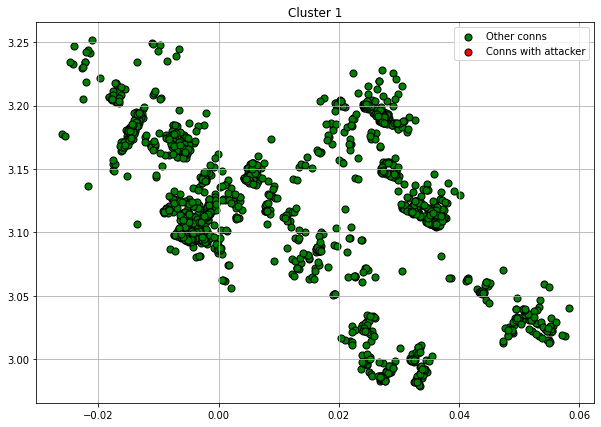

Total num of conns: 1619

Attacker conns ratio:
No    1619
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    1619
Name: originated_ip, dtype: int64

192.168.10.1    1619
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:15:55.780256Z
timestamp max = 2017-07-06T12:25:50.183207Z

Cluster 1 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
20437  CNU2i92b6E9xlx7AO2            1.00000  192.168.10.3           0.74843   
19782  CVXtnW1qGQrDmyCmvh            1.00000  192.168.10.3           0.74843   
4860   CXwKU0306nPYp75nVe            1.00000  192.168.10.3           0.74843   
16937  CcXo2w1gtnSj9B9U59            1.00000  192.168.10.3           0.74843   
17754  CldTVe4XEH74riN4r2            1.00000  192.168.10.3           0.74843   
8930   CGXsKv3iVlyAzbo4Ei            1.00000  192.168.10.3           0.74843   
2941   CRFOGL1yB3F0JQxJQ3            1.00000  192.168.10.3           0.74843   
14191   C5J3aSXcmSjNj0vha            1.00000  192.168.10.3           0.74843   
21443  CN4Gec35OBENf7AHQ7            1.00000  192.168.10.3           0.74843   
10277  Chr3LX1qcw4IqFdMx6            1.00000  192.168.10.3           0.74843   
21190  CqYKjQ1dpgpSGzE3Xl            1.00000  192.168.10.3           0.74843   
5537   C060kV1ve2Z4sEbl54            1.00000  192.168.10.3           0.74843   
17827  CDJ5yj3yxv1vgQJl5a            1.00000  192.168.10.3           0.74843   
1433   CxQGPP1pLTRyw6YHe4            1.00000  192.168.10.3           0.74843   
595    CTOho71DFKBpHA263a            1.00000  192.168.10.3           0.74843   

       responded_ip                    timestamp  connection.time  duration  \
20437  192.168.10.1  2017-07-06T12:23:36.059343Z          0.78624   0.11280   
19782  192.168.10.1  2017-07-06T12:17:10.107273Z          0.57130   0.18028   
4860   192.168.10.1  2017-07-06T12:19:09.309654Z          0.63768   0.02352   
16937  192.168.10.1  2017-07-06T12:18:27.660532Z          0.61449   0.04935   
17754  192.168.10.1  2017-07-06T12:19:38.981214Z          0.65421   0.13680   
8930   192.168.10.1  2017-07-06T12:17:06.017514Z          0.56902   0.06043   
2941   192.168.10.1  2017-07-06T12:25:07.385471Z          0.83711   0.03063   
14191  192.168.10.1  2017-07-06T12:23:08.580805Z          0.77094   0.06084   
21443  192.168.10.1  2017-07-06T12:20:44.037735Z          0.69044   0.03126   
10277  192.168.10.1  2017-07-06T12:20:13.648708Z          0.67352   0.06170   
21190  192.168.10.1  2017-07-06T12:25:12.806083Z          0.84013   0.03134   
5537   192.168.10.1  2017-07-06T12:23:54.839549Z          0.79670   0.03062   
17827  192.168.10.1  2017-07-06T12:23:08.465797Z          0.77088   0.17566   
1433   192.168.10.1  2017-07-06T12:25:13.478332Z          0.84050   0.03045   
595    192.168.10.1  2017-07-06T12:16:37.197587Z          0.55297   0.06023   

       connection.duration protocol service conn_state  connection.orig_p  \
20437              0.00009      udp     dns         SF            0.94862   
19782              0.00014      udp     dns         SF            0.91929   
4860               0.00002      udp     dns         SF            0.92007   
16937              0.00004      udp     dns         SF            0.91895   
17754              0.00011      udp     dns         SF            0.95326   
8930               0.00005      udp     dns         SF            0.94966   
2941               0.00002      udp     dns         SF            0.91787   
14191              0.00005      udp     dns         SF            0.94659   
21443              0.00002      udp     dns         SF            0.93025   
10277              0.00005      udp     dns         SF            0.92657   
21190              0.00002      udp     dns         SF            0.95265   
5537               0.00002      udp     dns         SF            0.93533   
17827              0.00014      udp     dns         SF            0.94290   
1433               0.00002      udp     dns         SF            0.92429   
595                0.00005      udp     dns         SF            0.95201   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
20437   62166  orig_reg_or_dyn                0.00021       48   
19782   60244  orig_reg_or_dyn                0.00018       41   
4860    60295  orig_reg_or_dyn               

Protocol:
udp    1619
Name: protocol, dtype: int64

Service:
dns    1619
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1619
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    1619
Name: resp_p_cat, dtype: int64




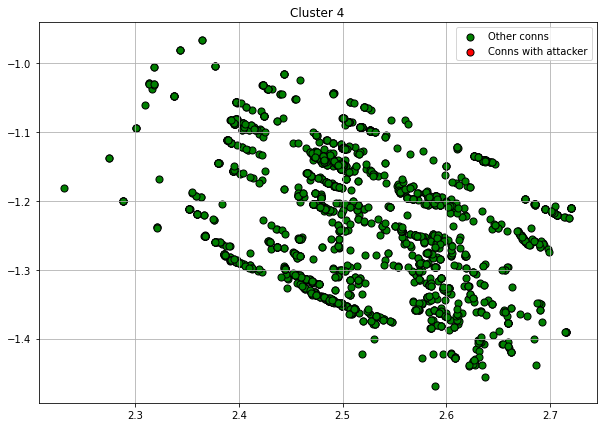

Total num of conns: 2065

Attacker conns ratio:
No    2065
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    1222
192.168.10.17     291
192.168.10.5      143
192.168.10.14     128
192.168.10.9      115
192.168.10.12      56
192.168.10.51      38
192.168.10.16      37
192.168.10.8       29
192.168.10.19       3
192.168.10.25       3
Name: originated_ip, dtype: int64

23.50.75.27       132
72.21.91.29       115
178.255.83.1       65
151.101.22.2       52
172.217.10.230     49
                 ... 
209.177.157.79      1
121.14.255.82       1
69.169.85.6         1
158.85.41.198       1
54.84.183.163       1
Name: responded_ip, Length: 387, dtype: int64

Time:
timestamp min = 2017-07-06T12:01:21.076933Z
timestamp max = 2017-07-06T12:29:59.848779Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
766    CdGloV3x7JmoRf9ffk            1.00000  192.168.10.14           0.26957   
10324   CBZVldBTkGxf6RXek            1.00000  192.168.10.15           0.58455   
18653  CfpuUe1idaxJbJzVfh            1.00000  192.168.10.15           0.66976   
18912  C6ptrR1vfv8Tkvf2S9            1.00000   192.168.10.8           0.26957   
10308   C5HmAyHPLlLl93M6a            1.00000  192.168.10.15           0.69418   
17441   CRo4r5lXZN40MSUNe            1.00000  192.168.10.15           0.81224   
2269   CAFuqQ1HhQP7tUD75k            1.00000   192.168.10.8           0.46403   
9927   CEhpWW1Mn1PPSsCfzj            1.00000  192.168.10.15           0.66976   
4509   C9Ios93awAjBghXENi            1.00000  192.168.10.14           0.07557   
10506   Clf1FVY9CqX1O9E33            1.00000  192.168.10.15           0.26957   
5582   CqdH364OuakkcRdMB7            1.00000   192.168.10.5           0.16678   
12530  CtF7eu4xrZ1KKC2s6c            1.00000  192.168.10.15           0.12519   
4736   CBNcZo38L8g9wqQTa6            1.00000  192.168.10.17           0.39675   
8289   C0tJ5F4cMIt9iovxX4            1.00000  192.168.10.15           0.66976   
13424  CMT4Mj1TQMCVLQjXBd            1.00000  192.168.10.15           0.74961   

         responded_ip                    timestamp  connection.time  duration  \
766       72.21.91.29  2017-07-06T12:05:54.462383Z          0.19501 106.77146   
10324    151.101.22.2  2017-07-06T12:21:04.345884Z          0.70175 115.18791   
18653    172.217.3.34  2017-07-06T12:25:13.808876Z          0.84068   5.69121   
18912     72.21.91.29  2017-07-06T12:05:38.031087Z          0.18586 175.47880   
10308    178.255.83.1   2017-07-06T12:08:13.41806Z          0.27240   3.31739   
17441  208.185.118.89  2017-07-06T12:16:31.742796Z          0.54993 117.65867   
2269     121.12.98.64  2017-07-06T12:14:38.816266Z          0.48704  11.26271   
9927   172.217.12.166  2017-07-06T12:16:34.528394Z          0.55148   5.19250   
4509     23.60.139.27  2017-07-06T12:28:24.873153Z          0.94709  71.90114   
10506     72.21.91.29  2017-07-06T12:20:18.178381Z          0.67604   5.07084   
5582     46.51.247.29  2017-07-06T12:20:35.897422Z          0.68591   7.84534   
12530  35.186.244.130  2017-07-06T12:27:20.461705Z          0.91122 115.36346   
4736   104.27.142.149  2017-07-06T12:29:05.424595Z          0.96968  47.48653   
8289   172.217.10.230  2017-07-06T12:10:15.558702Z          0.34042 116.16503   
13424  192.243.250.65  2017-07-06T12:25:08.827067Z          0.83791   5.65835   

       connection.duration protocol service conn_state  connection.orig_p  \
766                0.08234      tcp    http         SF            0.90307   
10324              0.08883      tcp    http         SF            0.77392   
18653              0.00439      tcp    none         SF            0.77792   
18912              0.13532      tcp    http         SF            0.75082   
10308              0.00256      tcp    none         SF            0.75921   
17441              0.09073      tcp    http         SF            0.76859   
2269               0.00869      tcp    http         SF            0.75190   
9927               0.00400      tcp    none         SF            0.76951   
4509               0.05545      tcp    http       RSTO            0.90945   
10506              0.00391      tcp    none         SF            0.77252   
5582               0.00605      tcp    http         SF            0.75658   
12530              0.08896      tcp    http         SF            0.77981   
4736               0.03662      tcp    http         SF            0.64390   
8289               0.08958      tcp    http         SF            0.76202   
13424              0.00436      tcp    none         SF            0.77658   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
766     59181  orig_reg_or_dyn                0.00192      429   
10324   50718  orig_reg_or_dyn                0.00205      459 

Protocol:
tcp    2065
Name: protocol, dtype: int64

Service:
http    1550
none     515
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2065
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            2064
resp_well_known       1
Name: resp_p_cat, dtype: int64




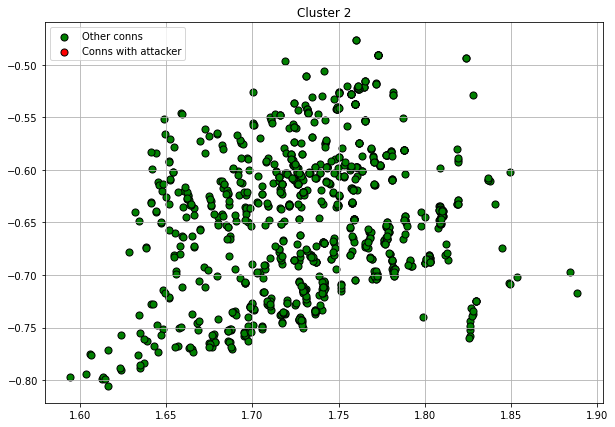

Total num of conns: 977

Attacker conns ratio:
No    977
Name: attacker_label, dtype: int64

IPs:
192.168.10.17    356
192.168.10.19    283
192.168.10.12    173
192.168.10.16    136
192.168.10.25     29
Name: originated_ip, dtype: int64

91.189.89.199      64
144.217.148.73     58
129.128.12.20      51
167.114.204.238    49
159.203.8.72       49
91.189.91.157      37
91.189.89.198      37
67.215.197.149     36
206.108.0.132      33
72.38.129.202      32
158.69.247.184     31
158.69.125.231     27
206.108.0.133      26
66.70.172.17       26
5.9.74.228         25
17.253.14.253      25
213.109.127.82     24
195.186.4.101      24
75.119.251.14      23
192.95.27.155      23
163.172.10.212     23
144.217.252.208    20
206.108.0.134      18
199.182.221.110    18
198.50.139.209     18
206.108.0.131      18
208.81.1.197       18
99.224.25.39       18
206.75.89.101      18
144.217.109.67     15
192.99.2.8         14
207.210.46.249     13
129.250.35.250     13
97.127.97.146      13
97.107.128.58 

uid  originated_ip_num  originated_ip  responded_ip_num  \
17338  CyzkxC20SSxX5paOuc            1.00000  192.168.10.17           0.77646   
17599  CiNBwY2QLL0qPesvbh            1.00000  192.168.10.12           0.64831   
10412   Caz3rCJp6vlR2oSX8            1.00000  192.168.10.12           0.25272   
3727   Cr6UPY1s305IVKH9yc            1.00000  192.168.10.17           0.49760   
8427   CPkDpz2Lu5eLg8HgCc            1.00000  192.168.10.17           0.55856   
10858   ChKeAJNkelF0rmfxh            1.00000  192.168.10.17           0.80310   
21280  C3ydJp35DGkJ5SjtBf            1.00000  192.168.10.17           0.80310   
168    CVzAbq4pH2CTx8pht7            1.00000  192.168.10.19           0.34763   
8647    CUDSDpNv48gUDzAq3            1.00000  192.168.10.17           0.55857   
12872  CMKTDG1U381zZkNR82            1.00000  192.168.10.17           0.80259   
4321    CTdjZj4LoI5M4t67i            1.00000  192.168.10.19           0.25272   
16513  COQknJ1D40GvqNAT57            1.00000  192.168.10.17           0.80259   
16220  Cgaymc1skT3DiDP7D7            1.00000  192.168.10.17           0.61187   
13226   CsdyDYatynu2ZTQ9h            1.00000  192.168.10.17           0.77043   
2040   CYQDWH3YGoz2hfPZha            1.00000  192.168.10.17           0.24650   

          responded_ip                    timestamp  connection.time  \
17338  199.182.221.110  2017-07-06T12:10:00.036724Z          0.33178   
17599  167.114.204.238  2017-07-06T12:16:45.014295Z          0.55732   
10412   67.215.197.149  2017-07-06T12:10:08.014046Z          0.33622   
3727     129.128.12.20   2017-07-06T12:29:44.03407Z          0.99118   
8427    144.217.148.73  2017-07-06T12:18:16.036907Z          0.60802   
10858    206.108.0.131  2017-07-06T12:11:12.036743Z          0.37188   
21280    206.108.0.134  2017-07-06T12:16:00.036856Z          0.53227   
168      91.189.91.157  2017-07-06T12:07:41.269181Z          0.25450   
8647   144.217.252.208  2017-07-06T12:26:31.034839Z          0.88369   
12872    206.75.89.101  2017-07-06T12:28:02.034451Z          0.93437   
4321    67.215.197.149  2017-07-06T12:16:42.269283Z          0.55579   
16513    206.75.89.101  2017-07-06T12:13:29.036797Z          0.44818   
16220   158.69.125.231  2017-07-06T12:08:14.036662Z          0.27275   
13226   198.50.139.209  2017-07-06T12:07:43.036706Z          0.25548   
2040      66.70.172.17  2017-07-06T12:10:19.036722Z          0.34236   

       duration  connection.duration protocol service conn_state  \
17338   0.07195              0.00006      udp     ntp         SF   
17599   0.01628              0.00001      udp     ntp         SF   
10412   0.02476              0.00002      udp     ntp         SF   
3727    0.09349              0.00007      udp     ntp         SF   
8427    0.01612              0.00001      udp     ntp         SF   
10858   0.02215              0.00002      udp     ntp         SF   
21280   0.02875              0.00002      udp     ntp         SF   
168     0.03661              0.00003      udp     ntp         SF   
8647    0.01647              0.00001      udp     ntp         SF   
12872   0.09284              0.00007      udp     ntp         SF   
4321    0.02479              0.00002      udp     ntp         SF   
16513   0.09274              0.00007      udp     ntp         SF   
16220   0.01618              0.00001      udp     ntp         SF   
13226   0.01630              0.00001      udp     ntp         SF   
2040    0.01703              0.00001      udp     ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
17338            0.00183     123  orig_well_known                0.00021   
17599            0.00183     123  orig_well_known                0.00021   
10412            0.00183     123  orig_well_known                0.00021   
3727             0.00183     123  orig_well_known                0.00021   
8427             0.00183     123  orig_well_known                0.00021   
10858            0.00183   

Protocol:
udp    977
Name: protocol, dtype: int64

Service:
ntp    977
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    977
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123    977
Name: resp_p_cat, dtype: int64




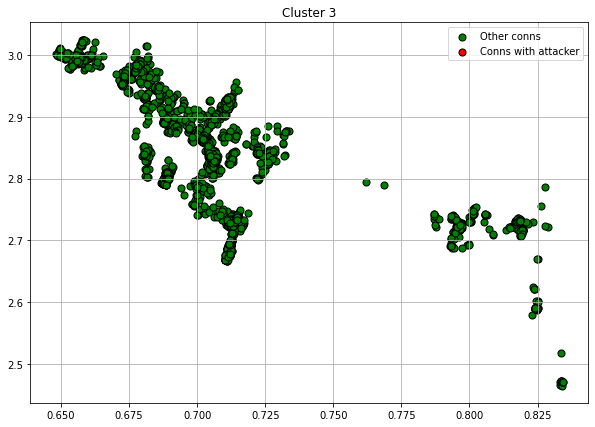

Total num of conns: 2690

Attacker conns ratio:
No    2690
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    2690
Name: originated_ip, dtype: int64

192.168.10.1    2690
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:37.858884Z
timestamp max = 2017-07-06T12:29:59.725635Z

Cluster 3 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
21780  CrjaR414FECzoo6dAc            1.00000  192.168.10.3           0.74843   
11944  CFJyrh211Rpmpuyee2            1.00000  192.168.10.3           0.74843   
5409   Cb790J2aDMEoScmaKe            1.00000  192.168.10.3           0.74843   
15417  CMR0YQ2vpjcrgt2ra9            1.00000  192.168.10.3           0.74843   
15370  C0XLzI1O9ZVa9ta5Z3            1.00000  192.168.10.3           0.74843   
20585  CpaAkB4068VYAdVeHa            1.00000  192.168.10.3           0.74843   
8592   C9wy1o3D74m4AJtx0g            1.00000  192.168.10.3           0.74843   
1469   CV391c1gfzNKIzDrl2            1.00000  192.168.10.3           0.74843   
9259    Cwn23B19n9ULOufWx            1.00000  192.168.10.3           0.74843   
8054   CI0JP41oIAwpbcAdNc            1.00000  192.168.10.3           0.74843   
18785  CXQo7A4qxAN3x4uAx4            1.00000  192.168.10.3           0.74843   
12541   C7ju6HLAC4mga2pMd            1.00000  192.168.10.3           0.74843   
21661  CxAqrG1bAi7rjvP5C3            1.00000  192.168.10.3           0.74843   
5529    Cf9NClKw9A0yFptE4            1.00000  192.168.10.3           0.74843   
15805  CY4qEb1nwL9Ed6PoWd            1.00000  192.168.10.3           0.74843   

       responded_ip                    timestamp  connection.time  duration  \
21780  192.168.10.1  2017-07-06T12:14:59.417649Z          0.49851   0.03120   
11944  192.168.10.1  2017-07-06T12:29:06.526107Z          0.97029   0.03070   
5409   192.168.10.1   2017-07-06T12:01:28.36241Z          0.04682   0.02391   
15417  192.168.10.1  2017-07-06T12:00:44.576222Z          0.02243   0.02332   
15370  192.168.10.1  2017-07-06T12:08:19.646517Z          0.27587   0.02458   
20585  192.168.10.1  2017-07-06T12:12:23.816177Z          0.41185   0.03039   
8592   192.168.10.1   2017-07-06T12:08:10.46552Z          0.27076   2.68342   
1469   192.168.10.1  2017-07-06T12:14:07.838378Z          0.46979   0.03110   
9259   192.168.10.1  2017-07-06T12:11:11.104175Z          0.37136   0.06325   
8054   192.168.10.1  2017-07-06T12:03:09.249347Z          0.10300   0.04849   
18785  192.168.10.1  2017-07-06T12:08:19.673026Z          0.27588   0.06736   
12541  192.168.10.1  2017-07-06T12:15:11.569654Z          0.50528   0.03039   
21661  192.168.10.1  2017-07-06T12:11:07.589463Z          0.36940   0.03195   
5529   192.168.10.1  2017-07-06T12:13:16.193627Z          0.44103   0.09304   
15805  192.168.10.1  2017-07-06T12:08:11.454707Z          0.27131   0.04744   

       connection.duration protocol service conn_state  connection.orig_p  \
21780              0.00002      udp     dns         SF            0.94200   
11944              0.00002      udp     dns         SF            0.92052   
5409               0.00002      udp     dns         SF            0.93173   
15417              0.00002      udp     dns         SF            0.92324   
15370              0.00002      udp     dns         SF            0.93882   
20585              0.00002      udp     dns         SF            0.92480   
8592               0.00207      udp     dns         SF            0.95204   
1469               0.00002      udp     dns         SF            0.93844   
9259               0.00005      udp     dns         SF            0.93981   
8054               0.00004      udp     dns         SF            0.91923   
18785              0.00005      udp     dns         SF            0.94577   
12541              0.00002      udp     dns         SF            0.94143   
21661              0.00002      udp     dns         SF            0.93345   
5529               0.00007      udp     dns         SF            0.95045   
15805              0.00004      udp     dns         SF            0.92545   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
21780   61732  orig_reg_or_dyn                0.00025       55   
11944   60325  orig_reg_or_dyn                0.00018       41   
5409    61059  orig_reg_or_dyn               

Protocol:
udp    2690
Name: protocol, dtype: int64

Service:
dns    2690
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2690
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    2690
Name: resp_p_cat, dtype: int64




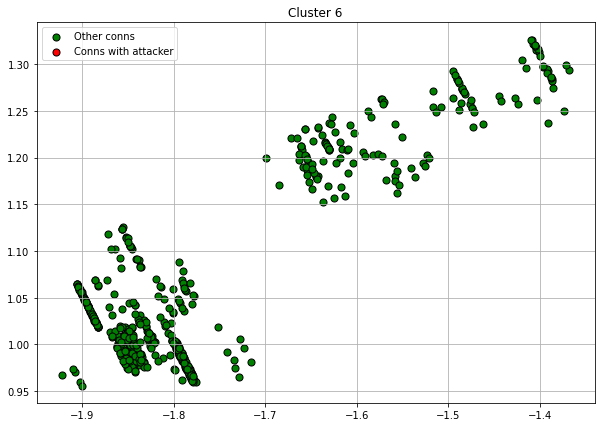

Total num of conns: 554

Attacker conns ratio:
No    554
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    315
192.168.10.17    125
192.168.10.16    112
192.168.10.12      2
Name: originated_ip, dtype: int64

192.168.10.3    554
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:18:05.646851Z
timestamp max = 2017-07-06T12:29:58.700844Z

Cluster 6 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
14895  Ca0sM71JiDXRnmJLVc            1.00000  192.168.10.17           0.74843   
18754  CZXIc51Qewf72qvKkf            1.00000  192.168.10.19           0.74843   
13883   C0HU5E73V4rLv6GI5            1.00000  192.168.10.19           0.74843   
2406   CxmPVb4x2nw013H6l6            1.00000  192.168.10.19           0.74843   
20654  CyPxS0310jbpK4euEf            1.00000  192.168.10.17           0.74843   
4115    ClDPV14zFLkmLPCoR            1.00000  192.168.10.17           0.74843   
903    CdRNT32Api8dV7XpKf            1.00000  192.168.10.16           0.74843   
18337  CzkBqy4LEdoLc5LZt9            1.00000  192.168.10.19           0.74843   
4048    CO8w5Od6u8i6qK8t4            1.00000  192.168.10.19           0.74843   
21367  C9Zhn24i3BIuK6zmb2            1.00000  192.168.10.19           0.74843   
11691   CSCHcu6Jb4R2Z8UJd            1.00000  192.168.10.19           0.74843   
273    CxDCAD2h2bvNAu8iMi            1.00000  192.168.10.16           0.74843   
19516   CTwAQgRwDl99fp6Sh            1.00000  192.168.10.16           0.74843   
4382   CFJNWc4zEz1vRFsOuk            1.00000  192.168.10.19           0.74843   
7225   Cba0Lq1BfMuQi91rw4            1.00000  192.168.10.19           0.74843   

       responded_ip                    timestamp  connection.time  duration  \
14895  192.168.10.3  2017-07-06T12:20:13.485434Z          0.67343   0.03156   
18754  192.168.10.3  2017-07-06T12:28:09.176294Z          0.93835   0.04859   
13883  192.168.10.3  2017-07-06T12:22:44.808471Z          0.75770   0.00028   
2406   192.168.10.3  2017-07-06T12:23:16.350571Z          0.77527   0.00017   
20654  192.168.10.3  2017-07-06T12:20:13.236569Z          0.67329   0.03158   
4115   192.168.10.3  2017-07-06T12:20:13.438539Z          0.67340   0.00017   
903    192.168.10.3   2017-07-06T12:19:35.15426Z          0.65208   0.00024   
18337  192.168.10.3  2017-07-06T12:22:16.864154Z          0.74214   1.09502   
4048   192.168.10.3   2017-07-06T12:18:24.46775Z          0.61271   0.10328   
21367  192.168.10.3  2017-07-06T12:18:05.971028Z          0.60241   0.14947   
11691  192.168.10.3  2017-07-06T12:24:54.555664Z          0.82996   0.00042   
273    192.168.10.3  2017-07-06T12:19:40.058964Z          0.65481   0.00023   
19516  192.168.10.3  2017-07-06T12:19:36.710257Z          0.65294   0.04817   
4382   192.168.10.3  2017-07-06T12:18:23.677569Z          0.61227   0.06110   
7225   192.168.10.3    2017-07-06T12:29:49.4209Z          0.99418   7.24616   

       connection.duration protocol service conn_state  connection.orig_p  \
14895              0.00002      udp     dns         SF            0.88775   
18754              0.00004      udp     dns         SF            0.80804   
13883              0.00000      udp     dns         SF            0.15523   
2406               0.00000      udp     dns         SF            0.42935   
20654              0.00002      udp     dns         SF            0.20075   
4115               0.00000      udp     dns         SF            0.50182   
903                0.00000      udp     dns         SF            0.65909   
18337              0.00084      udp     dns         SF            0.18830   
4048               0.00008      udp     dns         SF            0.18150   
21367              0.00012      udp     dns         SF            0.63801   
11691              0.00000      udp     dns         SF            0.60101   
273                0.00000      udp     dns         SF            0.30391   
19516              0.00004      udp     dns         SF            0.38820   
4382               0.00005      udp     dns         SF            0.08881   
7225               0.00559      udp     dns         SF            0.42416   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
14895   58177  orig_reg_or_dyn                0.00030       68   
18754   52954  orig_reg_or_dyn                0.00037       82   
13883   10175  orig_reg_or_dy

Protocol:
udp    554
Name: protocol, dtype: int64

Service:
dns    554
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    554
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    554
Name: resp_p_cat, dtype: int64




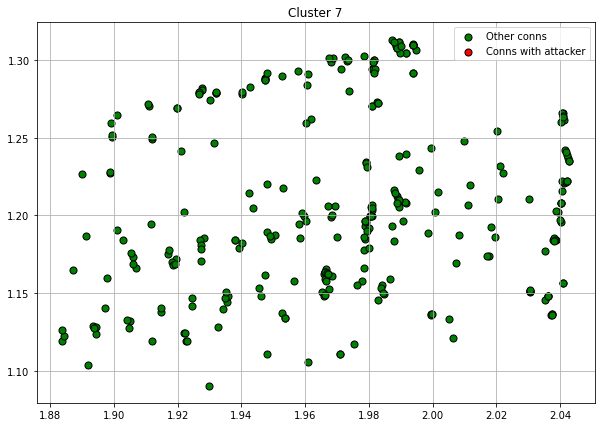

Total num of conns: 299

Attacker conns ratio:
No    299
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    196
192.168.10.17     71
192.168.10.16     21
192.168.10.12     11
Name: originated_ip, dtype: int64

159.203.8.72       17
144.217.148.73     17
91.189.89.199      16
167.114.204.238    16
129.128.12.20      14
206.108.0.132      14
91.189.89.198      14
91.189.91.157      14
67.215.197.149     13
158.69.247.184     13
72.38.129.202      12
192.99.2.8         11
195.186.4.101      11
5.9.74.228         11
213.109.127.82     11
75.119.251.14      10
192.95.27.155      10
163.172.10.212     10
144.217.109.67      5
66.70.172.17        5
158.69.125.231      5
199.182.221.110     4
206.75.89.101       4
206.108.0.134       4
198.50.139.209      4
208.81.1.197        4
99.224.25.39        4
206.108.0.133       4
206.108.0.131       4
97.127.97.146       3
129.250.35.250      3
207.210.46.249      3
97.107.128.58       3
144.217.252.208     3
206.71.252.18       1
144.217.240.2

uid  originated_ip_num  originated_ip  responded_ip_num  \
12119  C6KIT23obtioL0vIid            1.00000  192.168.10.19           0.55856   
7244   CVOiDr21JXSW2PGCSf            1.00000  192.168.10.19           0.61187   
14151  CEecx12Vob4AfF4Djf            1.00000  192.168.10.12           0.64831   
6063   C6QPlC19rWyWBLa7xe            1.00000  192.168.10.19           0.76062   
6777   CvncPt4d7wtkuY8spk            1.00000  192.168.10.17           0.55857   
4075   CZrfCs22d4b4PbZHg1            1.00000  192.168.10.19           0.61187   
14266  CcdCqL3UxSCK1CUpAf            1.00000  192.168.10.19           0.63331   
5270   CmJQct3bNHKvLzOCy5            1.00000  192.168.10.19           0.34763   
18677  CXItxt1O8QMFAyaGke            1.00000  192.168.10.19           0.55856   
10291  CtM1iT3Zekwwlncpf1            1.00000  192.168.10.19           0.64831   
6563    CwvwDd311gqigWTYG            1.00000  192.168.10.19           0.00328   
9805   CTeHjz3X1QAQz8RRyf            1.00000  192.168.10.17           0.55856   
1447   CzZfa13x7vHwsphuL5            1.00000  192.168.10.19           0.00328   
21728  CelUKv4GvMTwpFxS1h            1.00000  192.168.10.17           0.61187   
5913   CxeoJt47XlIQFpTtkj            1.00000  192.168.10.12           0.61187   

          responded_ip                    timestamp  connection.time  \
12119   144.217.148.73  2017-07-06T12:23:37.269314Z          0.78692   
7244    158.69.247.184   2017-07-06T12:22:34.26932Z          0.75183   
14151  167.114.204.238  2017-07-06T12:23:26.014385Z          0.78065   
6063     195.186.4.101  2017-07-06T12:20:41.269302Z          0.68890   
6777   144.217.252.208  2017-07-06T12:22:00.036618Z          0.73277   
4075    158.69.247.184  2017-07-06T12:24:50.269299Z          0.82757   
14266   163.172.10.212   2017-07-06T12:24:44.26929Z          0.82423   
5270     91.189.91.157  2017-07-06T12:20:40.269273Z          0.68834   
18677   144.217.148.73  2017-07-06T12:27:00.269371Z          0.89997   
10291  167.114.204.238  2017-07-06T12:23:27.269321Z          0.78135   
6563        5.9.74.228  2017-07-06T12:29:26.269411Z          0.98129   
9805    144.217.148.73  2017-07-06T12:22:47.036218Z          0.75894   
1447        5.9.74.228  2017-07-06T12:23:49.269314Z          0.79360   
21728   158.69.125.231  2017-07-06T12:22:54.036167Z          0.76284   
5913    158.69.247.184  2017-07-06T12:21:15.014337Z          0.70769   

       duration  connection.duration protocol service conn_state  \
12119   0.01618              0.00001      udp     ntp         SF   
7244    0.01633              0.00001      udp     ntp         SF   
14151   0.01626              0.00001      udp     ntp         SF   
6063    0.12091              0.00009      udp     ntp         SF   
6777    0.01637              0.00001      udp     ntp         SF   
4075    0.01628              0.00001      udp     ntp         SF   
14266   0.10129              0.00008      udp     ntp         SF   
5270    0.03652              0.00003      udp     ntp         SF   
18677   0.01611              0.00001      udp     ntp         SF   
10291   0.01624              0.00001      udp     ntp         SF   
6563    0.11596              0.00009      udp     ntp         SF   
9805    0.01619              0.00001      udp     ntp         SF   
1447    0.11592              0.00009      udp     ntp         SF   
21728   0.01614              0.00001      udp     ntp         SF   
5913    0.01636              0.00001      udp     ntp         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
12119            0.00183     123  orig_well_known                0.00021   
7244             0.00183     123  orig_well_known                0.00021   
14151            0.00183     123  orig_well_known                0.00021   
6063             0.00183     123  orig_well_known                0.00021   
6777             0.00183     123  orig_well_known                0.00021   
4075             0.00183   

Protocol:
udp    299
Name: protocol, dtype: int64

Service:
ntp    299
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    299
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123    299
Name: resp_p_cat, dtype: int64




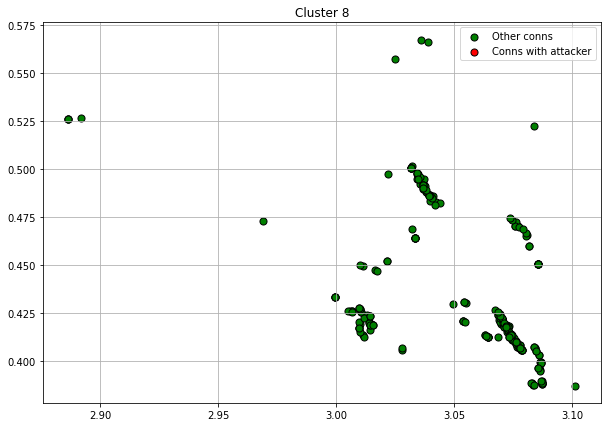

Total num of conns: 251

Attacker conns ratio:
No    251
Name: attacker_label, dtype: int64

IPs:
192.168.10.16    139
192.168.10.19     69
192.168.10.17     43
Name: originated_ip, dtype: int64

46.4.42.118       41
74.117.200.68      9
46.4.94.98         8
172.217.12.163     8
172.217.10.226     8
                  ..
172.217.11.1       1
23.208.157.175     1
52.84.40.145       1
94.31.29.64        1
151.101.65.108     1
Name: responded_ip, Length: 92, dtype: int64

Time:
timestamp min = 2017-07-06T12:18:06.120814Z
timestamp max = 2017-07-06T12:28:09.225116Z

Cluster 8 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
19797  ChbkM7428hI7xFy3Sa            1.00000  192.168.10.19           0.52718   
1546   CuMaqA1TiKTbxl6t8i            1.00000  192.168.10.19           0.66976   
19692  CBMWZf45DYdc21J0c3            1.00000  192.168.10.19           0.71879   
1104   CK2m303n6jcD4xBwo7            1.00000  192.168.10.16           0.16604   
17232  C1MjPb2Viy6rFfLLY6            1.00000  192.168.10.19           0.25440   
21528  CJ2IHI3saDrbN2VMl7            1.00000  192.168.10.19           0.20149   
15791  ChimqK2BX239nZ30t6            1.00000  192.168.10.19           0.71879   
6238   CIqibD4ERgFoNS1hJd            1.00000  192.168.10.16           0.66976   
944    CtLr2M3FBSNf9OXMwl            1.00000  192.168.10.16           0.16604   
12345   Co2DDo66AefDAyUtc            1.00000  192.168.10.19           0.71879   
8141   CJptDt34fwkFlvNGqg            1.00000  192.168.10.16           0.16604   
3808   CdMYNj1NtlR6l3hSV8            1.00000  192.168.10.16           0.72062   
19231   CU7aO1mVBemgMAWcc            1.00000  192.168.10.17           0.66976   
5601   CPTgKt1gXDiTaf0nn8            1.00000  192.168.10.19           0.66976   
1216   CgEmEa1Gezd7t3iD51            1.00000  192.168.10.19           0.07800   

         responded_ip                    timestamp  connection.time  duration  \
19797  136.243.11.135  2017-07-06T12:18:28.617225Z          0.61502   5.70953   
1546    172.217.10.48  2017-07-06T12:18:23.741436Z          0.61231 115.59478   
19692    185.49.134.3   2017-07-06T12:18:22.74984Z          0.61175   3.17298   
1104      46.4.42.118  2017-07-06T12:22:21.639859Z          0.74480   5.35262   
17232   68.67.178.138  2017-07-06T12:18:27.852815Z          0.61460  10.10657   
21528    54.241.30.40  2017-07-06T12:18:27.937593Z          0.61464  65.32237   
15791    185.49.134.3  2017-07-06T12:18:22.749683Z          0.61175   3.16580   
6238   172.217.12.142  2017-07-06T12:19:35.639555Z          0.65235 185.30733   
944       46.4.42.118  2017-07-06T12:20:41.639002Z          0.68911   4.29737   
12345  185.49.132.129  2017-07-06T12:18:23.450248Z          0.61214   2.93564   
8141       46.4.94.98  2017-07-06T12:19:35.493215Z          0.65227  77.17596   
3808   185.167.164.37    2017-07-06T12:19:39.2527Z          0.65436   0.51466   
19231  172.217.10.132  2017-07-06T12:20:13.526855Z          0.67345 115.54624   
5601    172.217.6.195  2017-07-06T12:18:28.012731Z          0.61469 115.32544   
1216     23.217.37.23   2017-07-06T12:18:06.12083Z          0.60249   5.12270   

       connection.duration protocol service conn_state  connection.orig_p  \
19797              0.00440      tcp     ssl         SF            0.59177   
1546               0.08914      tcp     ssl         SF            0.82655   
19692              0.00245      tcp     ssl         SF            0.90578   
1104               0.00413      tcp     ssl         SF            0.57673   
17232              0.00779      tcp     ssl         SF            0.63786   
21528              0.05037      tcp     ssl         SF            0.78242   
15791              0.00244      tcp     ssl         SF            0.90575   
6238               0.14290      tcp     ssl         SF            0.63115   
944                0.00331      tcp     ssl         SF            0.57609   
12345              0.00226      tcp     ssl         SF            0.62059   
8141               0.05952      tcp     ssl         SF            0.87702   
3808               0.00040      tcp     ssl         SF            0.53440   
19231              0.08911      tcp     ssl         SF            0.81611   
5601               0.08894      tcp     ssl         SF            0.77960   
1216               0.00395      tcp     ssl         SF            0.58314   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
19797   38782  orig_reg_or_dyn                0.00284      635   
1546    54167  orig_reg_or_dyn                0.00325      726 

Protocol:
tcp    251
Name: protocol, dtype: int64

Service:
ssl     247
none      4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    251
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           250
resp_well_known      1
Name: resp_p_cat, dtype: int64




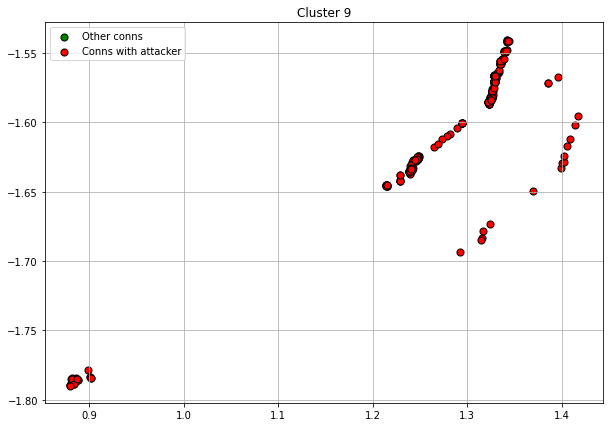

Total num of conns: 276

Attacker conns ratio:
Yes    276
Name: attacker_label, dtype: int64

IPs:
172.16.0.1    276
Name: originated_ip, dtype: int64

192.168.10.50    276
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:21:21.175725Z
timestamp max = 2017-07-06T12:29:58.772569Z

Cluster 9 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
20275  Ck79OS1BsXC5ysjeX1            0.00000    172.16.0.1           0.74843   
825     CIj1Z972k1deubJDb            0.00000    172.16.0.1           0.74843   
9237   CeZxKl1asCZ87laMR9            0.00000    172.16.0.1           0.74843   
1791    CvfI493K1EctYBWae            0.00000    172.16.0.1           0.74843   
8479    C7XobAKBhhZw5FuH4            0.00000    172.16.0.1           0.74843   
5944   C1bbkK3mjsrNh35tEg            0.00000    172.16.0.1           0.74843   
15831  C7W2eJ2coGmCMGHp41            0.00000    172.16.0.1           0.74843   
5259   CQ5zkd37zQziWnD8na            0.00000    172.16.0.1           0.74843   
20383   CvSnZ12wnE0j81uGe            0.00000    172.16.0.1           0.74843   
20504  CDIuq34WmvENVFiUW8            0.00000    172.16.0.1           0.74843   
19005  Cp46XZ2s4OkUweicdj            0.00000    172.16.0.1           0.74843   
5115   CEw8fr48W2vCw2XPIg            0.00000    172.16.0.1           0.74843   
1651   Cr9lCX2mea0qGSz6P7            0.00000    172.16.0.1           0.74843   
6519   CEgsEd3qMsBHte6pKb            0.00000    172.16.0.1           0.74843   
15637  CSv83W1K0MU9ZFIZk7            0.00000    172.16.0.1           0.74843   

        responded_ip                    timestamp  connection.time  duration  \
20275  192.168.10.50  2017-07-06T12:27:46.127625Z          0.92551   5.93435   
825    192.168.10.50  2017-07-06T12:22:22.373901Z          0.74521   5.60484   
9237   192.168.10.50  2017-07-06T12:23:38.526502Z          0.78762   5.47164   
1791   192.168.10.50  2017-07-06T12:25:59.549162Z          0.86616   5.48550   
8479   192.168.10.50  2017-07-06T12:22:05.789076Z          0.73597   5.18548   
5944   192.168.10.50  2017-07-06T12:22:12.107328Z          0.73949   5.86961   
15831  192.168.10.50  2017-07-06T12:28:42.142255Z          0.95671   5.93714   
5259   192.168.10.50   2017-07-06T12:24:44.77878Z          0.82452   5.23577   
20383  192.168.10.50  2017-07-06T12:26:36.251662Z          0.88660   5.79503   
20504  192.168.10.50  2017-07-06T12:23:09.289726Z          0.77134   5.70238   
19005  192.168.10.50  2017-07-06T12:27:15.711503Z          0.90857   9.78658   
5115   192.168.10.50  2017-07-06T12:23:06.766398Z          0.76993   5.22428   
1651   192.168.10.50  2017-07-06T12:28:35.773004Z          0.95316   5.30366   
6519   192.168.10.50  2017-07-06T12:22:31.209516Z          0.75013   5.77169   
15637  192.168.10.50  2017-07-06T12:29:37.176424Z          0.98736   5.91457   

       connection.duration protocol service conn_state  connection.orig_p  \
20275              0.00458      tcp    none         SF            0.76681   
825                0.00432      tcp    none         SF            0.69087   
9237               0.00422      tcp    none         SF            0.70876   
1791               0.00423      tcp    none         SF            0.74184   
8479               0.00400      tcp    none         SF            0.68703   
5944               0.00453      tcp    none         SF            0.68849   
15831              0.00458      tcp    none         SF            0.77996   
5259               0.00404      tcp    none         SF            0.72426   
20383              0.00447      tcp    none         SF            0.75045   
20504              0.00440      tcp    none         SF            0.70189   
19005              0.00755      tcp    http         SF            0.75970   
5115               0.00403      tcp    none         SF            0.70131   
1651               0.00409      tcp    none         SF            0.77850   
6519               0.00445      tcp    none         SF            0.69295   
15637              0.00456      tcp    none         SF            0.79275   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
20275   50252  orig_reg_or_dyn                0.00000        0   
825     45276  orig_reg_or_dyn                0.00000        0   
9237    46448  orig_reg_or_dy

Protocol:
tcp    276
Name: protocol, dtype: int64

Service:
none    262
http     14
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    276
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    276
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.18691              0.00232            0.75100   
1              0.69326              0.00355            0.77352   
2              0.83932              0.01740            0.58976   
3              0.37158              0.00002            0.68121   
4              0.39924              0.00000            0.90291   
...                ...                  ...                ...   
21871          0.61261              0.00002            0.50766   
21872          0.98811              0.00010            0.94578   
21873          0.61366              0.00033            0.34335   
21874          0.26889              0.04734            0.75649   
21875          0.84020              0.00007            0.84480   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.00000               0.00000            0.00675   
1                    0.01271               0.00001            0.00675   
2                    0.00417               0.00003            0.00121   
3                    0.00035               0.00000            0.00079   
4                    0.00032               0.00000            0.00079   
...                      ...                   ...                ...   
21871                0.00032               0.00000            0.00079   
21872                0.00023               0.00000            0.00079   
21873                0.00032               0.00000            0.00079   
21874                0.00415               0.00002            0.00675   
21875                0.00073               0.00000            0.00079   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00000               0.00000    0.00000    0.00000   
1                    0.00002               0.00003    0.00000    0.00000   
2                    0.00002               0.00003    0.00000    0.00000   
3                    0.00000               0.00000    1.00000    0.00000   
4                    0.00000               0.00000    1.00000    0.00000   
...                      ...                   ...        ...        ...   
21871                0.00000               0.00000    1.00000    0.00000   
21872                0.00000               0.00000    1.00000    0.00000   
21873                0.00000               0.00000    1.00000    0.00000   
21874                0.00000               0.00001    0.00000    0.00000   
21875                0.00000               0.00000    1.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    0.00000      0.00000                           1   
1         0.00000    1.00000      0.00000                           1   
2         1.00000    0.00000      0.00000                           1   
3         0.00000    0.00000      0.00000                           1   
4         0.00000    0.00000      0.00000                           1   
...           ...        ...          ...                         ...   
21871     0.00000    0.00000      0.00000                           1   
21872     0.00000    0.00000      0.00000                           1   
21873     0.00000    0.00000      0.00000                           1   
21874     0.00000    1.00000      0.02632                           1   
21875     0.00000    0.00000      0.00000                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   0   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
2

In [41]:
from datetime import date

print(PREFIX_PATH + 'dbscan_backup' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'dbscan_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)
df.to_csv(PREFIX_PATH + 'dbscan_df_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/dbscan_backup09_12.csv


## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 10
Estimated number of noise points: 2124
Silhouette Coefficient: 0.554


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

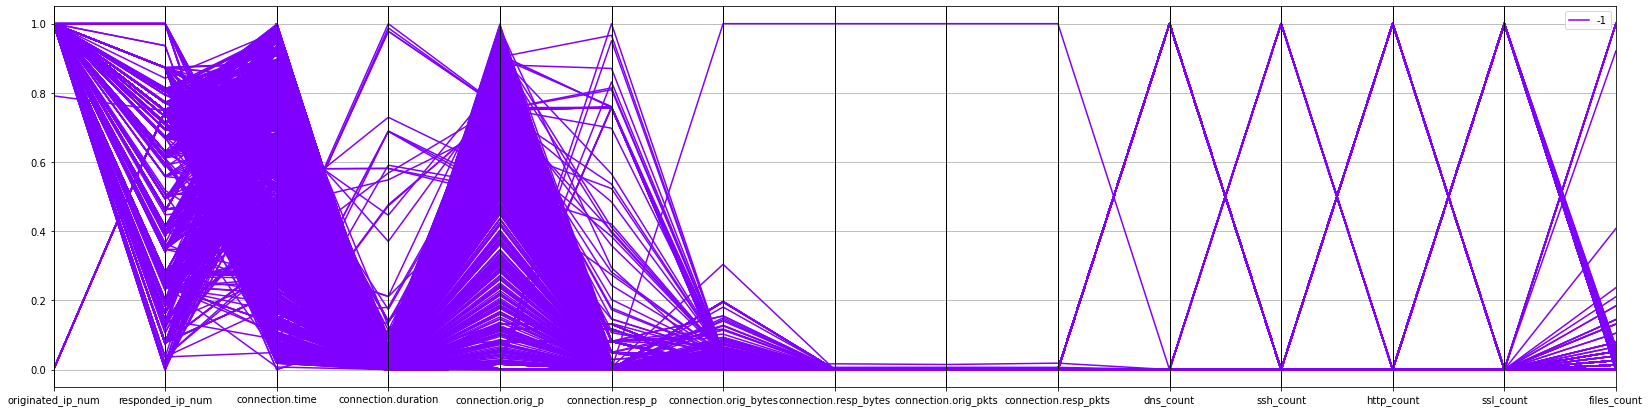

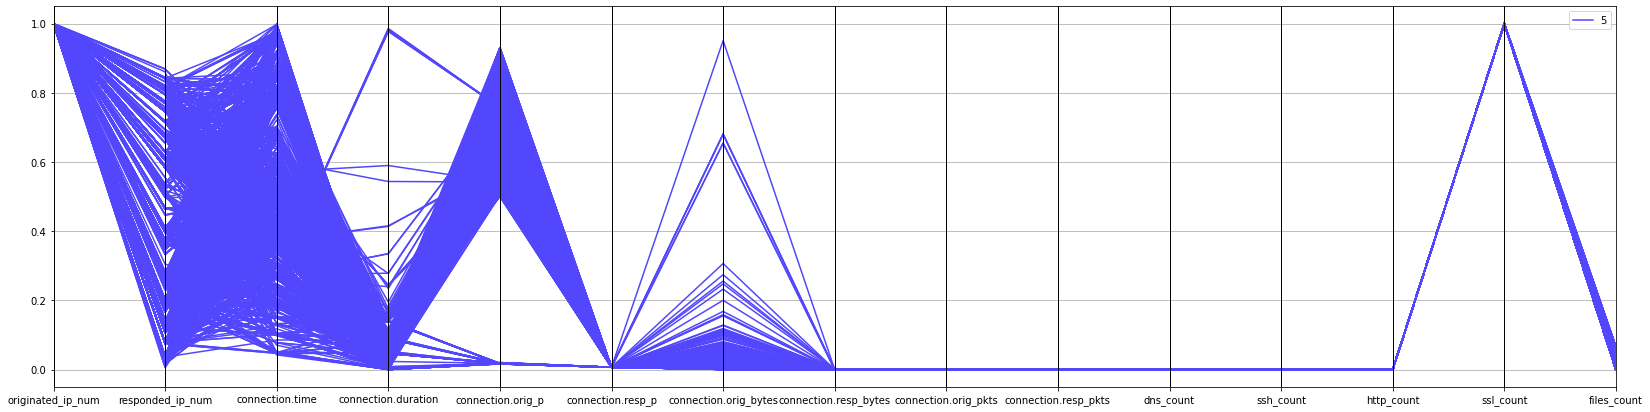

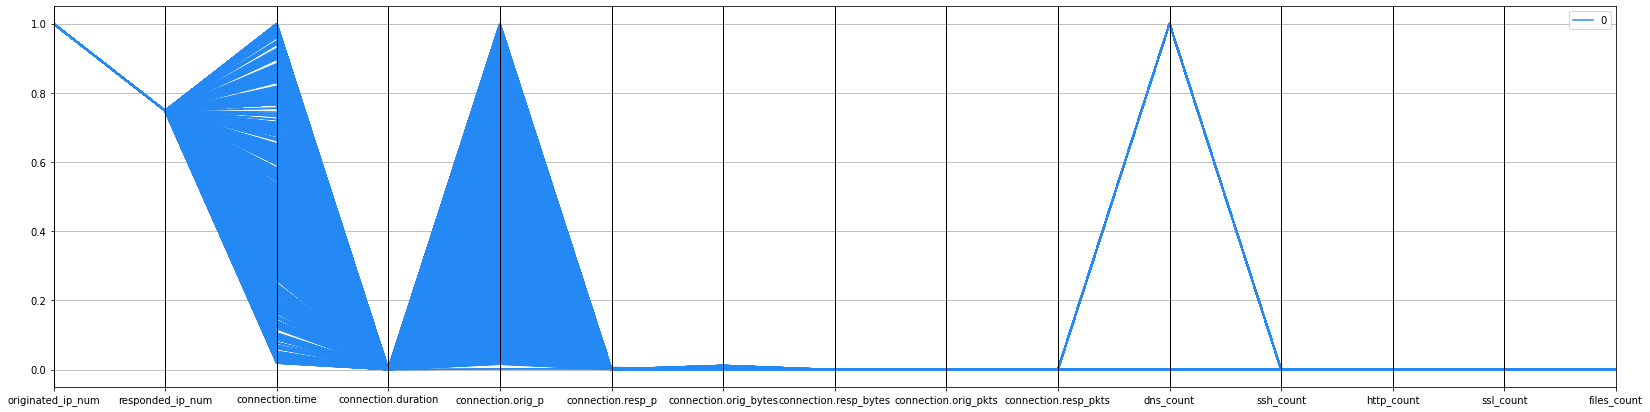

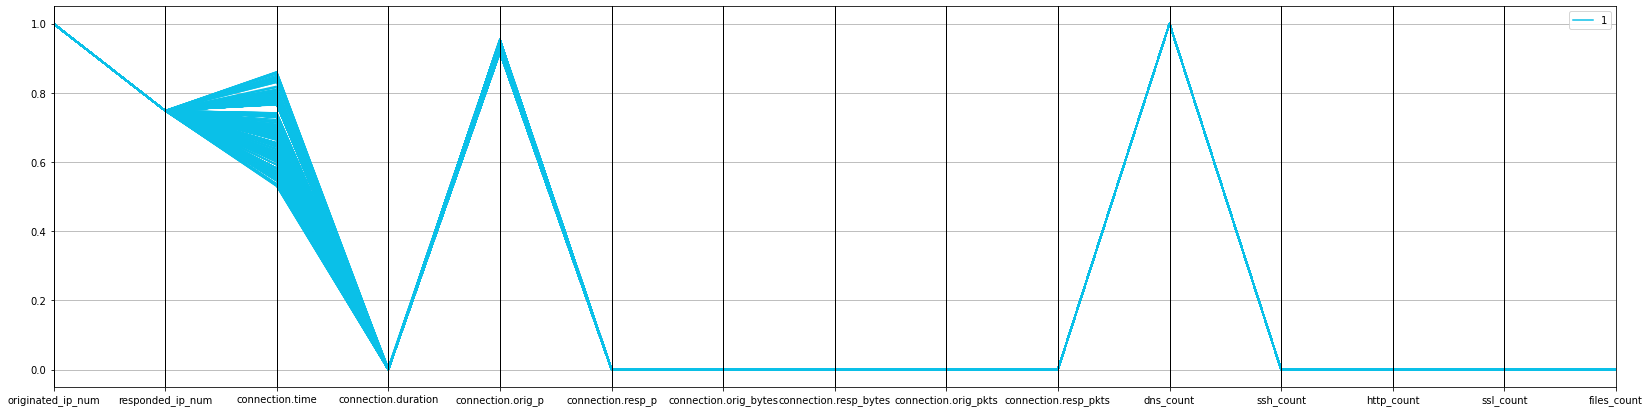

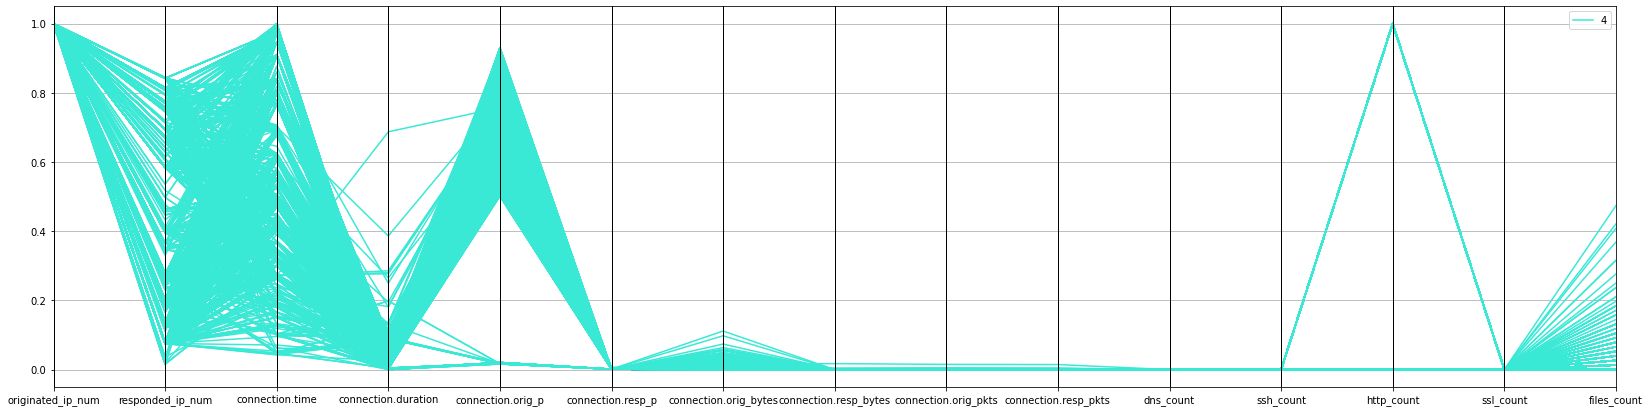

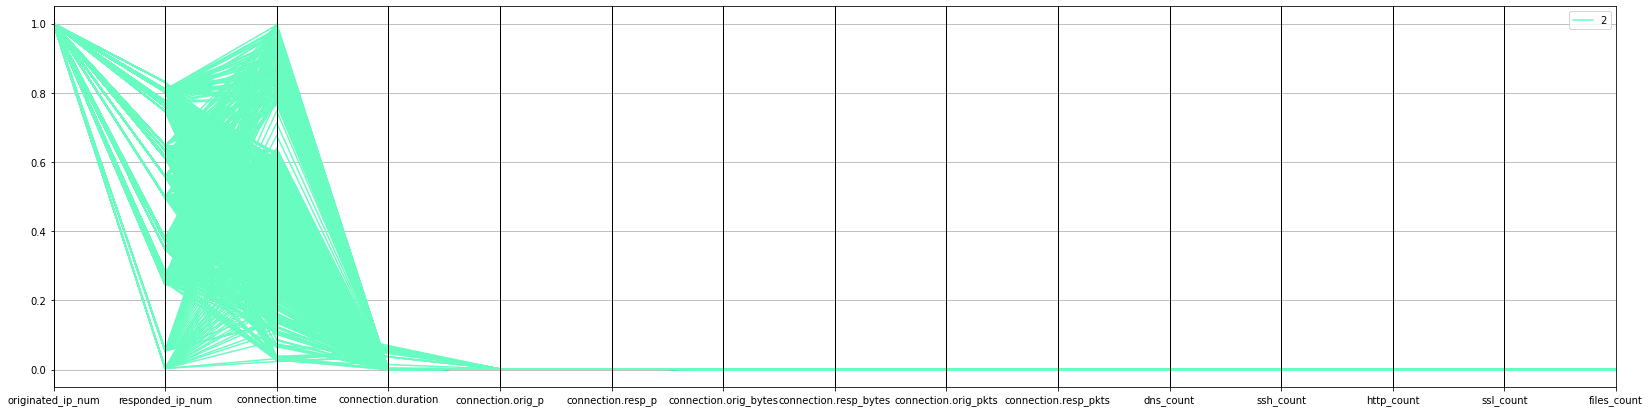

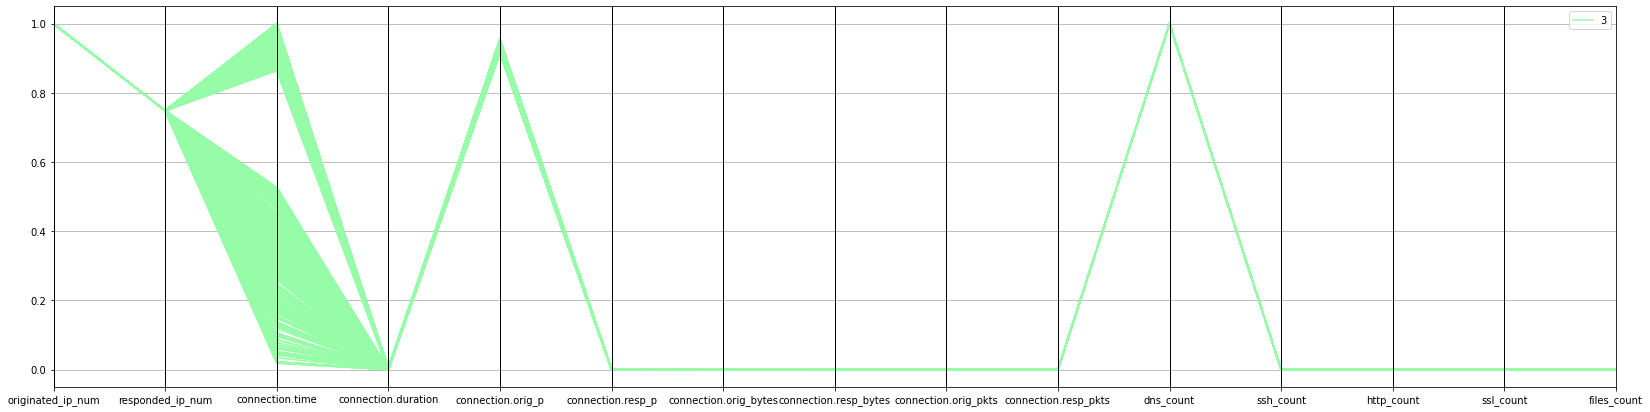

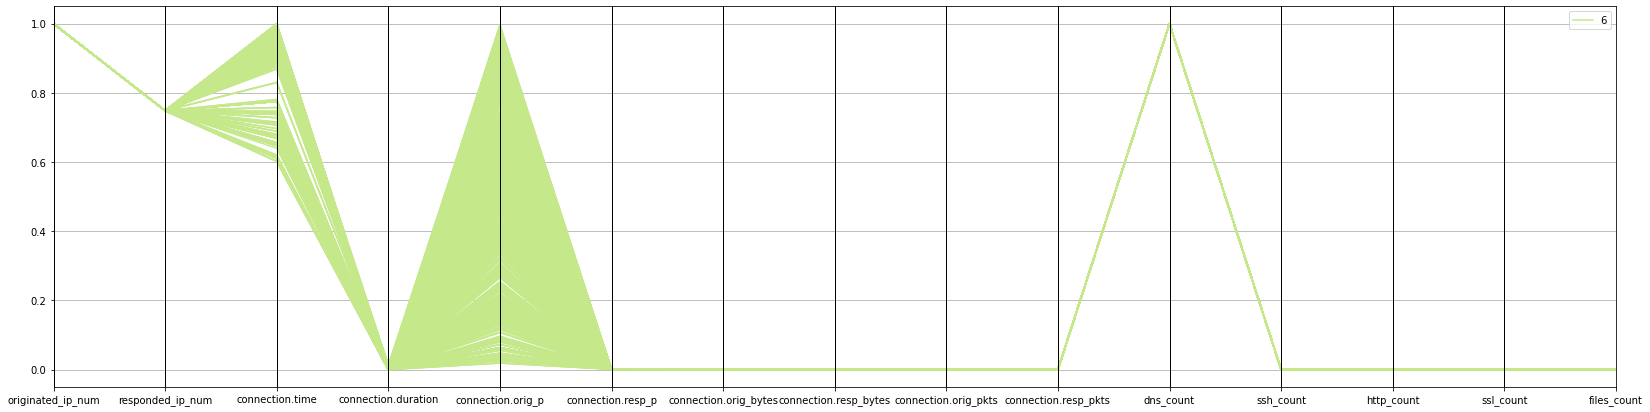

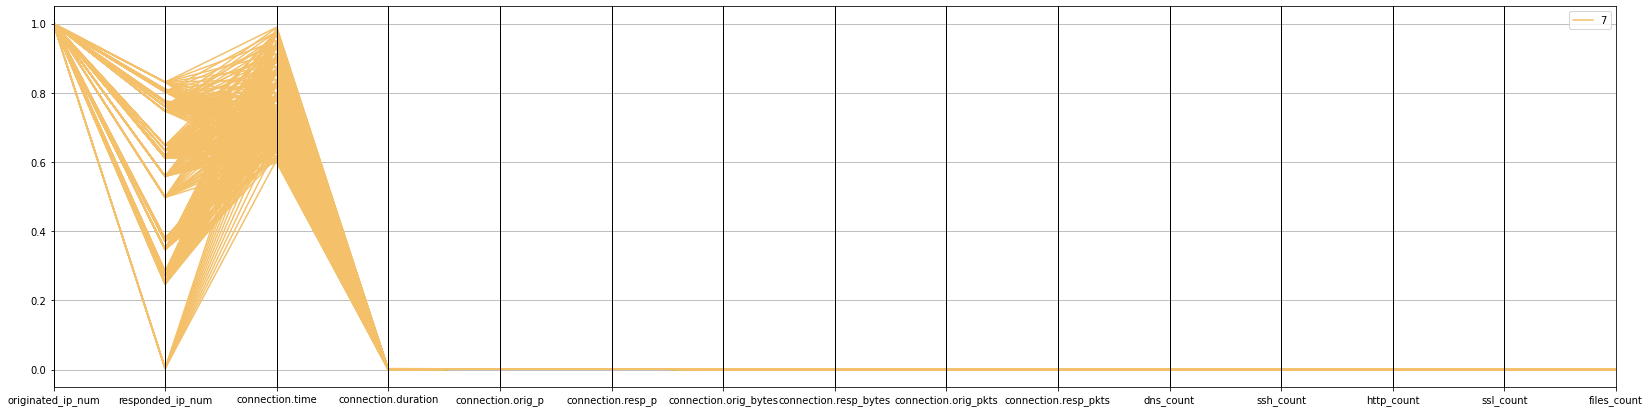

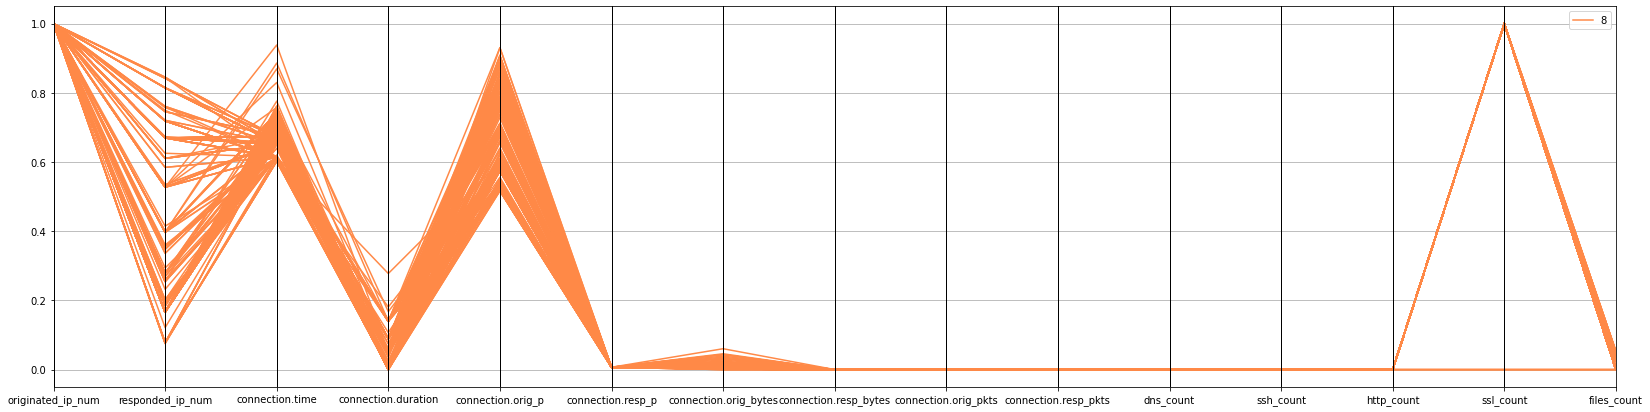

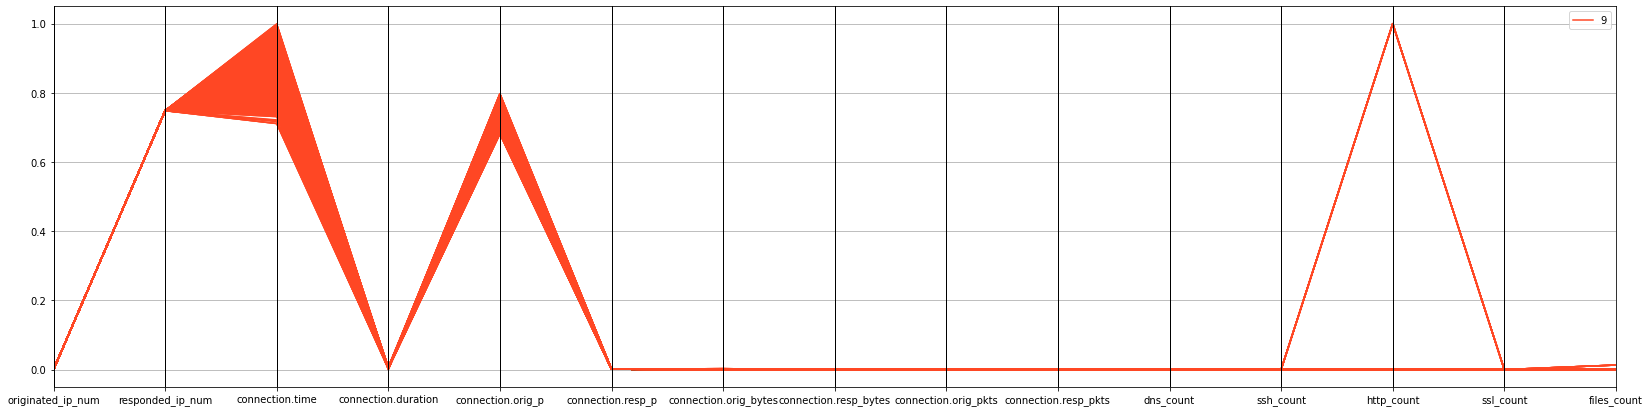

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

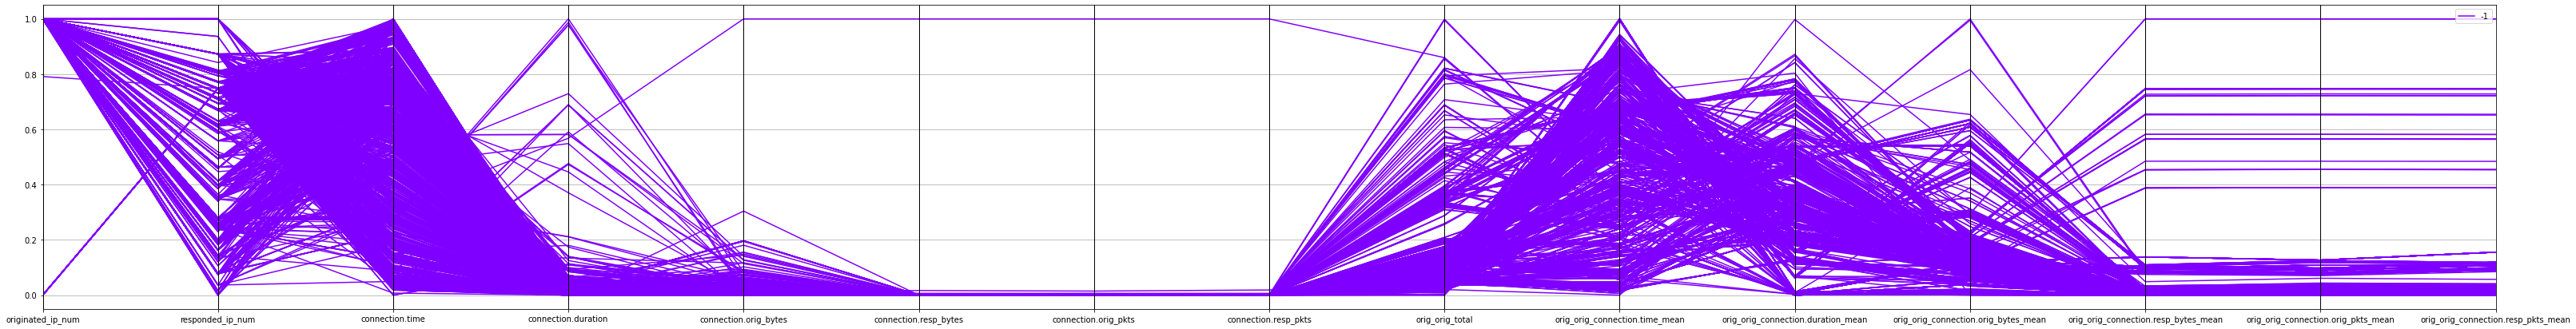

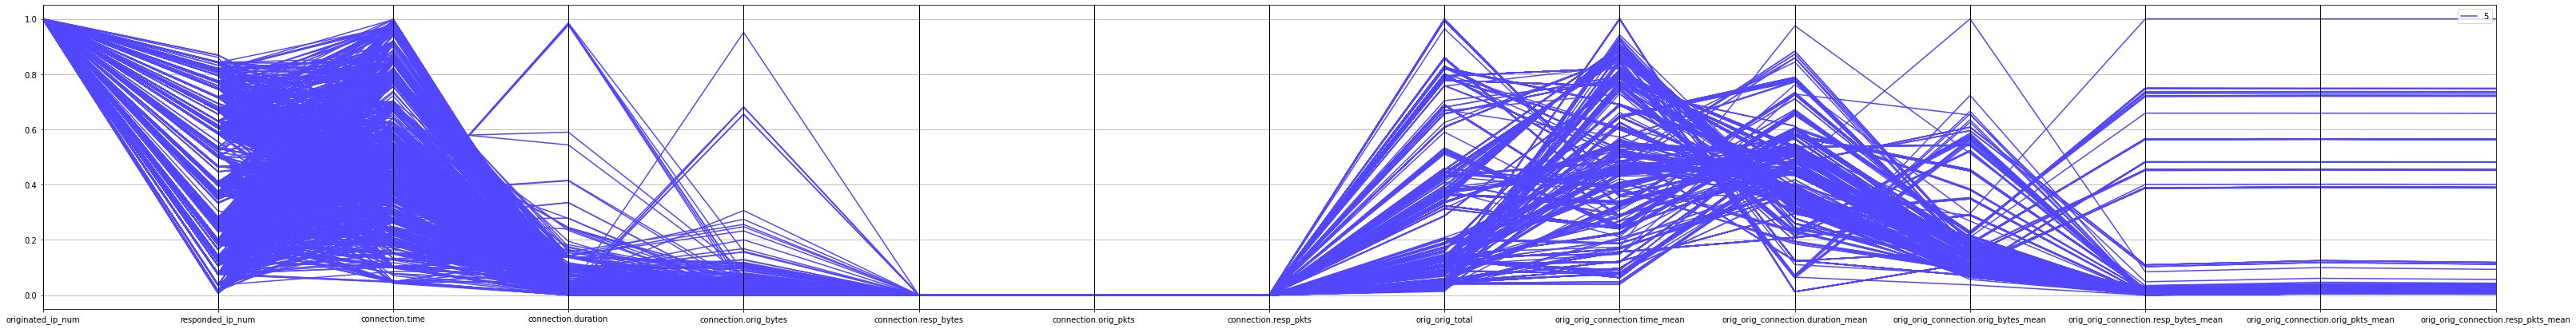

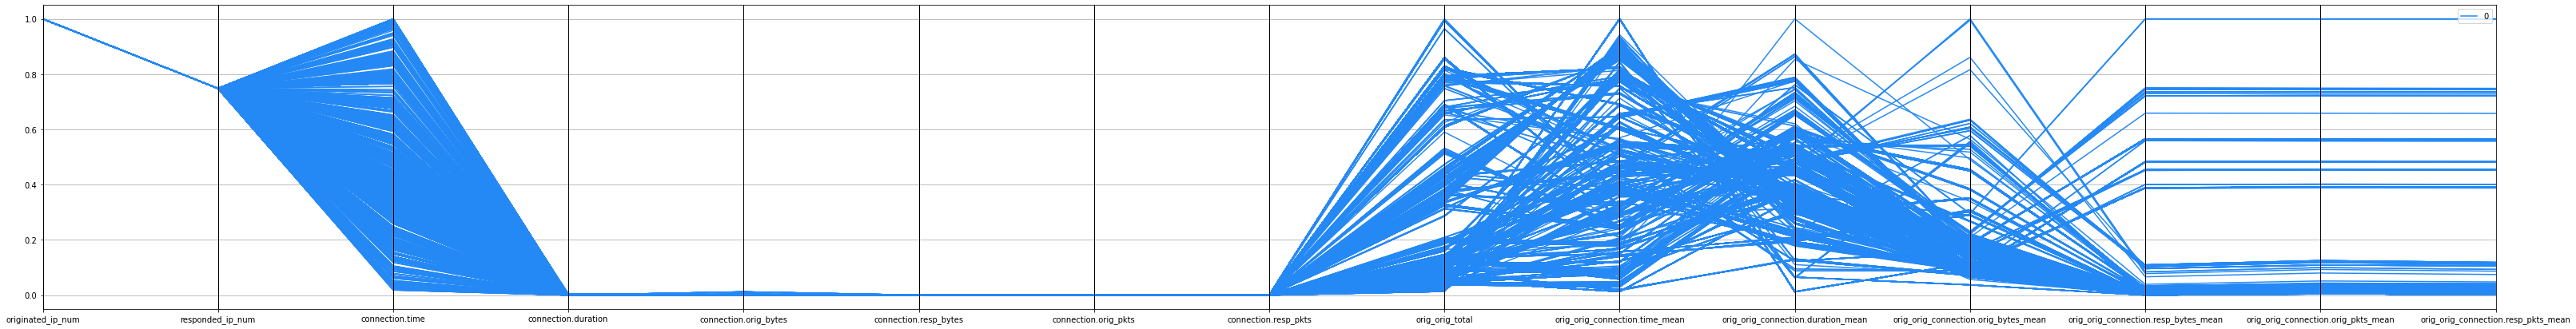

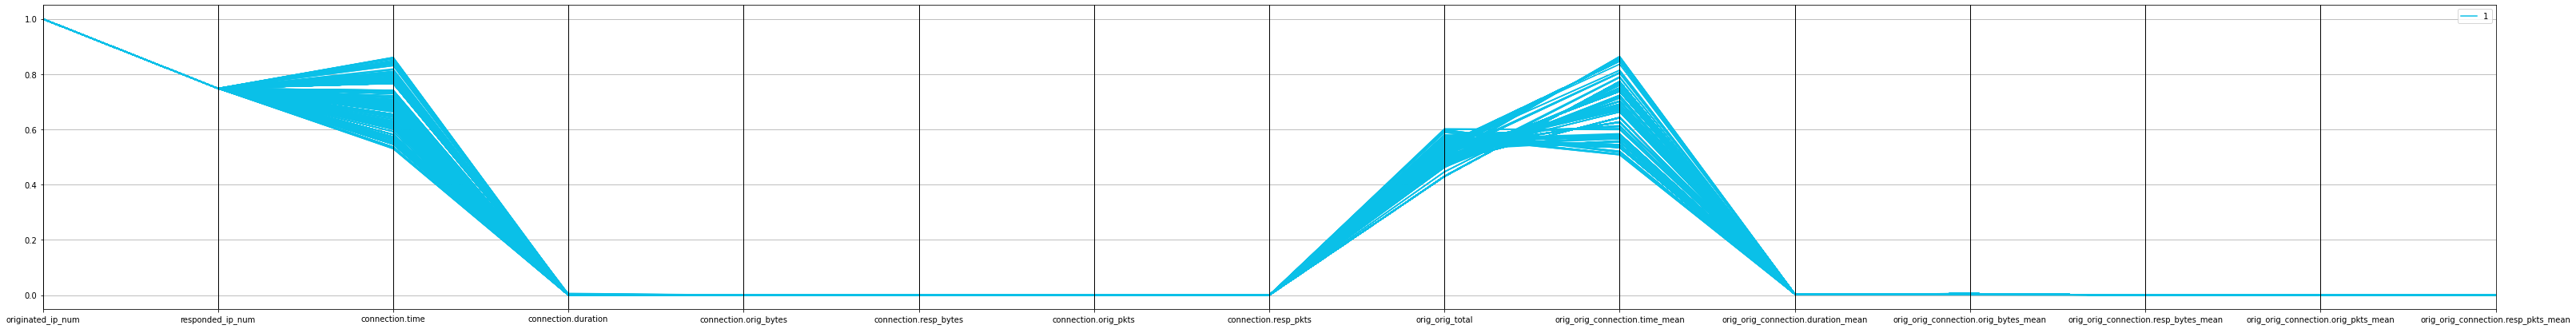

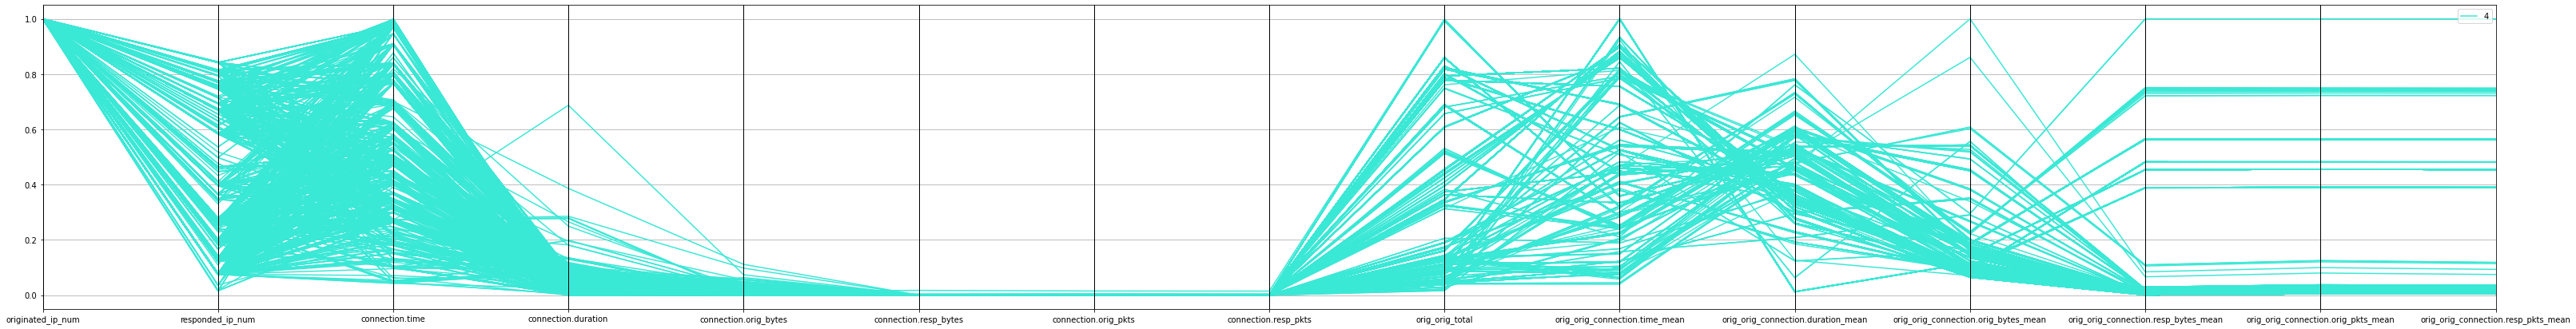

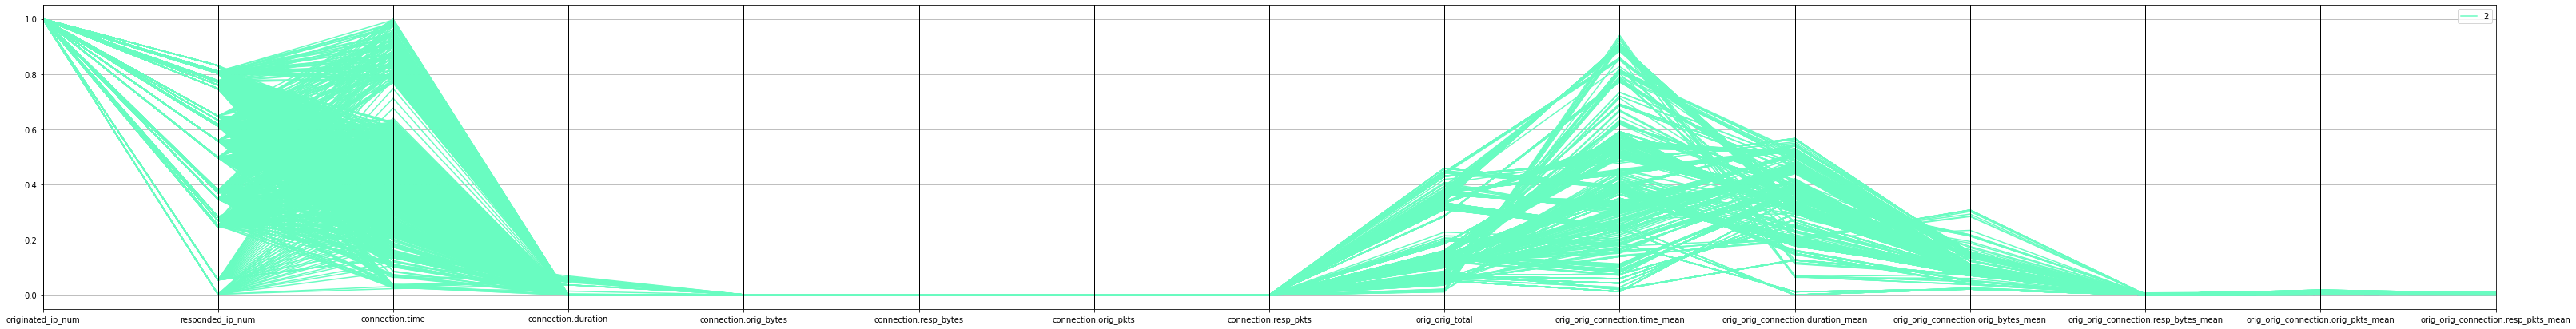

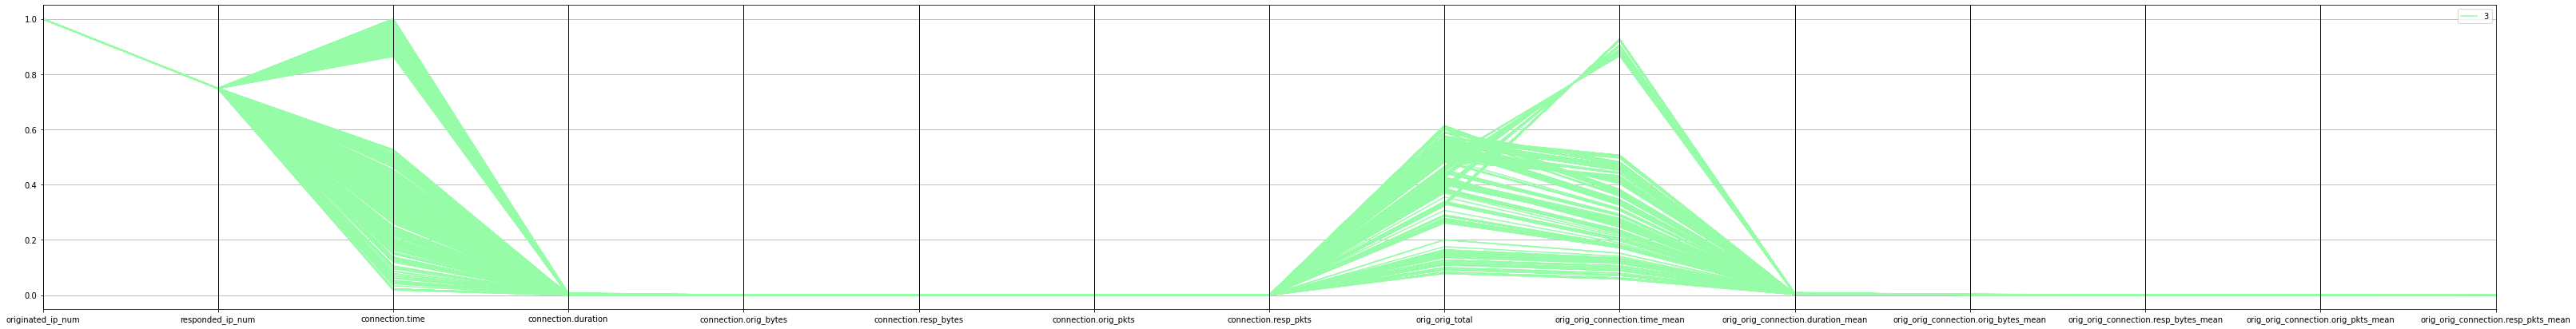

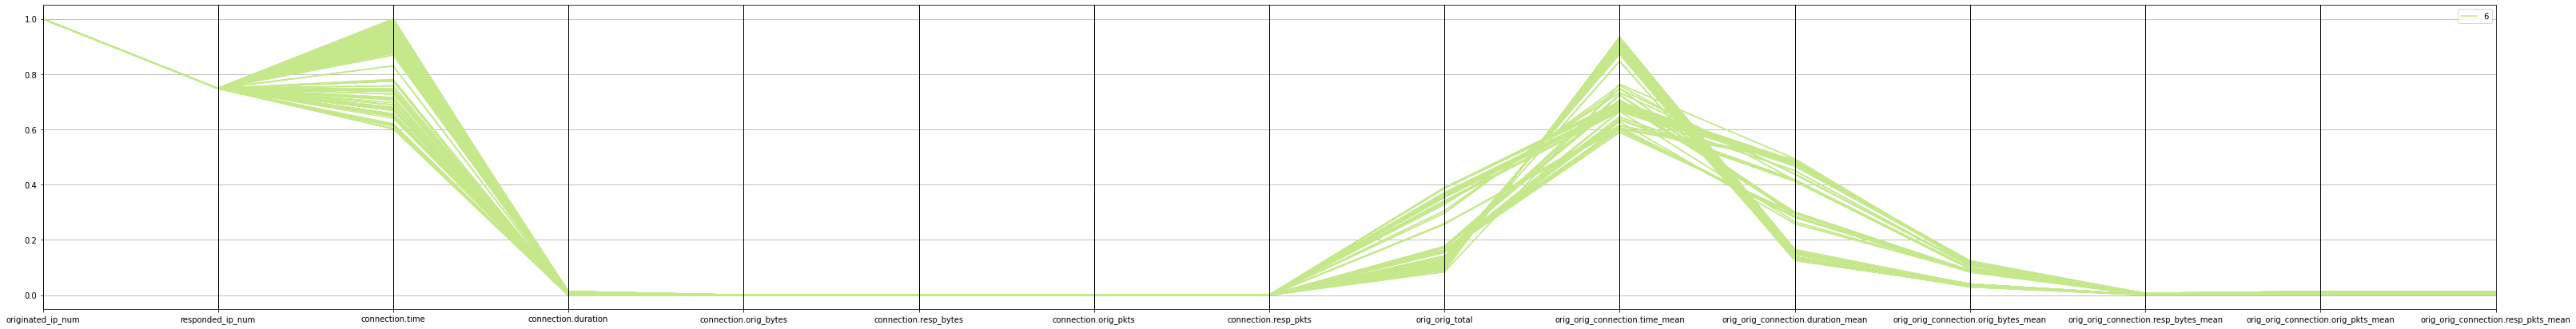

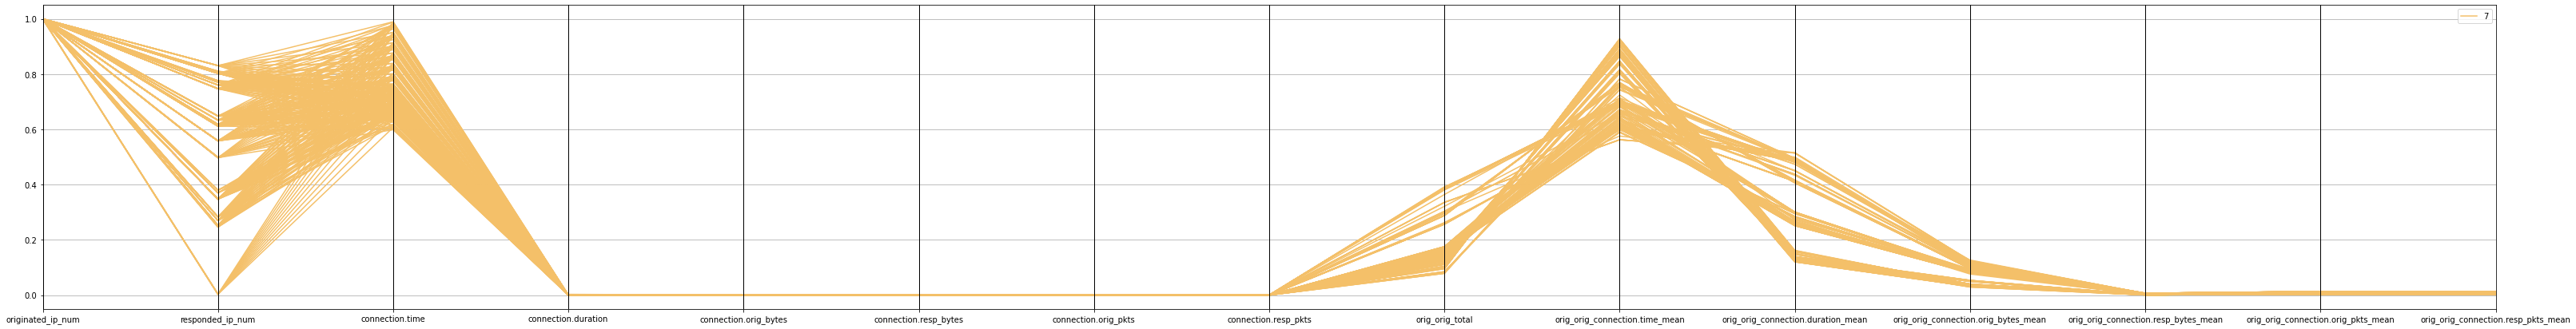

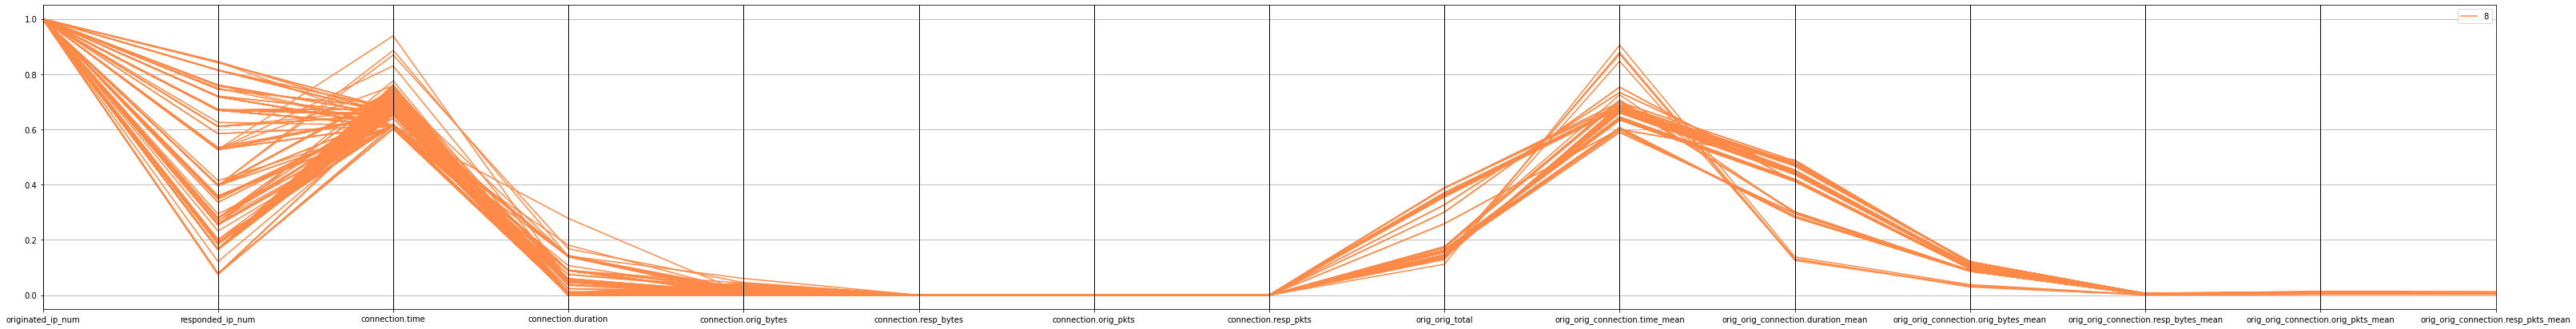

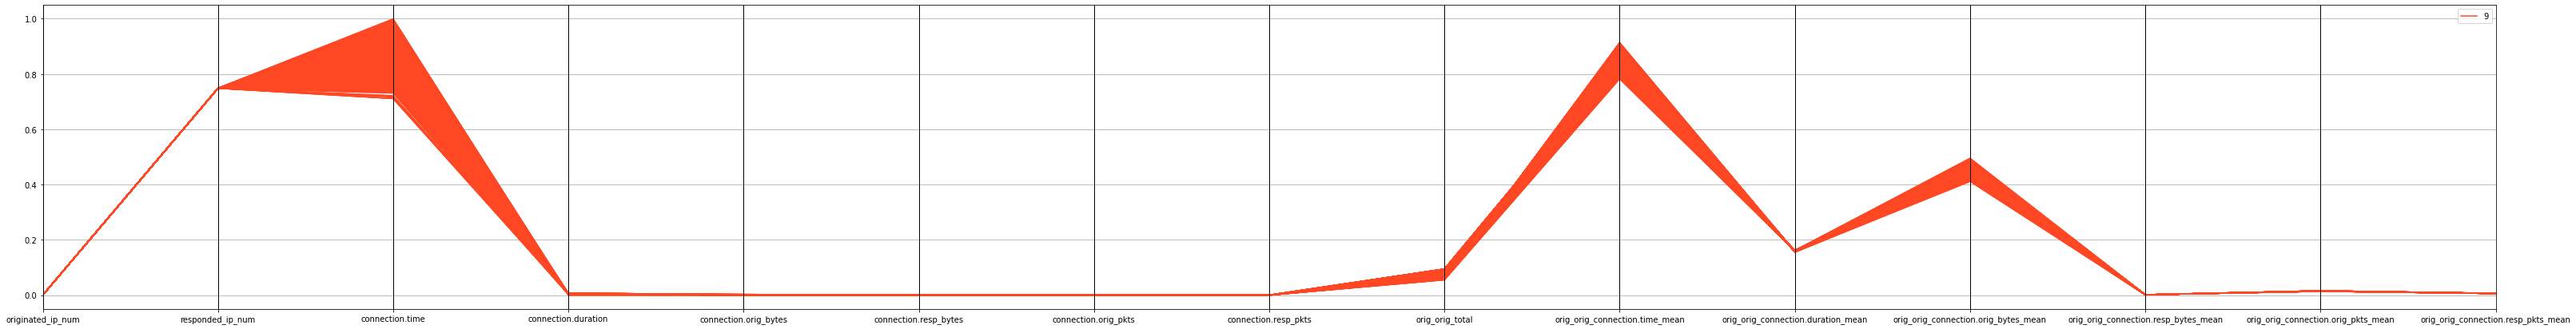

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()